## <center> COGNITIVE, BEHAVIORAL AND SOCIAL DATA PROJECT </center>
#### <center> MSc in Data Science </center>
#### <center> University of Padua </center>

Authors:

* Federico Zanotti
* Lorenzo Corrado
* Luca Pessina

Dataset: IADQ - Adjustment Disorder

#### <center> A.Y. 2021/2022 </center>

<br>
<center>
    <a href="https://colab.research.google.com/github/maks-sh/scikit-uplift/blob/master/notebooks/RetailHero_EN.ipynb">
        <img src="https://sites.google.com/site/studiopsicologicofurcigiorgi/_/rsrc/1337783726242/servizi/supporto-psicologico/disturbi-dell-umore/immagine%20depressione.jpg">
</center>

In [ ]:
#@title Loading Libraries { display-mode: "form" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans

## Introduction

The questionnaire studied is related to the **Adjustment Disorder**; an adjustment disorder (AD) is an emotional or behavioral reaction to a stressful event or change in a person’s life. The reaction is considered an unhealthy or excessive response to the event or change within three months of it happening.


--- 




* **What causes the AD?**

> Adjustment disorders are a reaction to an event. There is not a single direct cause between the stressful event and the reaction. Stressful events or changes in the life of your child or adolescent may be a family move, the parents’ divorce or separation, the loss of a pet, or the birth of a sibling. No evidence is available to suggest a specific factor that causes adjustment disorders.



* **Risk Factors**

> Adjustment disorders are quite common in children and adolescents. They happen equally in males and females. While adjustment disorders happen in all cultures, the stressors and signs may vary based on cultural influences.

* **Symptoms of AD**

> The reaction should significantly interfere with social, occupational or educational functioning. Adolescent symptoms of adjustment disorders can be more behavioral, such as acting out. Adults who experience adjustment disorders exhibit more depressive symptoms.

* **Diagnosing AD**

> A child and adolescent psychiatrist or a qualified mental health professional usually makes the diagnosis of an adjustment disorder following a comprehensive psychiatric evaluation and interview with the child or adolescent and their parents. 
It is also possibile to use some specific questionnaire like the International Adjustment Disorder Questionnaire (**IADQ**) that is a brief, simply-worded measure, focusing only on the core features of Adjustment Disorder, and employs straightforward diagnostic rules. 




The questionnaire investigates different aspect of the disorder, in particular:

1. I worry a lot more since the stressful event(s) (preoccupation Pr1).

2. I cannot stop thinking about the stressful event(s) (preoccupation Pr2). 

3. I often feel afraid about what might happen in the future since the stressful event(s) (preoccupation). 

4. I find it difficult to adapt to life since the stressful event(s) (failure to adapt).

5. I find it difficult to relax and feel calm since the stressful event(s) (failure to adapt). 

6. I find it difficult to achieve a state of inner peace since the stressful event(s) (failure to adapt). 

7. In the past month have the above problems affected your relationships or social life? (evidence of functional impairment).

8.  In the past month have the above problems affected your ability to work or your educational life? (evidence of functional impairment).

9.  In the past month have the above problems affected any other important part of your life? (evidence of functional impairment). 

Each answer of the questionnaire can take an increasing value from 0 to 4, where 0 indicates that the user does not have any disturbances. We have:
* 225 "Honest" users
* 225 "Dishonest users"

A probable diagnosis of Adjustment Disorder requires the presence of (1) a psychosocial stressor (score ≥ 1 on the IADQ stressor list, items 1-9), (2) at least one ‘Preoccupation’ symptom (items 10-12) rated ≥ 2), (3) at least one ‘Failure to Adapt’ symptom (items 13-15) rated ≥ 2, (4) symptoms began within one month of the stressor (positive endorsement of item 16), and (5) evidence of functional impairment indicated by any of item 17-19 rated ≥ 2).


<br>
<center>
    <a href="https://colab.research.google.com/github/maks-sh/scikit-uplift/blob/master/notebooks/RetailHero_EN.ipynb">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWBT8_NuW3r0UmiaFVO4TdXmihE0_bL6EWAQ&usqp=CAU">
</center>

## Exploratory Data Analysis

In the following section we will explore the dataset available. We will try to understand the statistic below and if is there any pattern. 

We will report some useful statistics and plot, the function used for the visualizations are available in the dedicated module.

In [ ]:
### Load Data ###

df = pd.read_csv("IADQ_df.csv")
X = df.iloc[:,0:9]
y = df.CONDITION

df_H = df.loc[df.CONDITION == "H",:]
df_D = df.loc[df.CONDITION == "D",:]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pr1        450 non-null    int64 
 1   Pr2        450 non-null    int64 
 2   Pr3        450 non-null    int64 
 3   FA1        450 non-null    int64 
 4   FA2        450 non-null    int64 
 5   FA3        450 non-null    int64 
 6   FI1        450 non-null    int64 
 7   FI2        450 non-null    int64 
 8   FI3        450 non-null    int64 
 9   CONDITION  450 non-null    object
dtypes: int64(9), object(1)
memory usage: 35.3+ KB
None


In [ ]:
print(df.head(), "\n")
print(df.tail())

   Pr1  Pr2  Pr3  FA1  FA2  FA3  FI1  FI2  FI3 CONDITION
0    4    2    3    2    2    2    2    2    1         H
1    2    3    2    3    2    1    3    2    3         H
2    4    3    3    4    4    4    3    3    3         H
3    3    3    2    1    3    2    3    2    3         H
4    3    2    2    3    3    3    4    3    3         H 

     Pr1  Pr2  Pr3  FA1  FA2  FA3  FI1  FI2  FI3 CONDITION
445    4    4    4    4    4    4    4    4    4         D
446    4    3    4    4    3    3    4    4    4         D
447    3    4    4    4    4    4    3    3    4         D
448    3    4    4    3    3    3    3    4    3         D
449    4    4    4    4    4    4    4    4    4         D


In [ ]:
print(df.describe())

              Pr1         Pr2         Pr3  ...         FI1         FI2         FI3
count  450.000000  450.000000  450.000000  ...  450.000000  450.000000  450.000000
mean     3.128889    3.091111    3.177778  ...    2.962222    3.133333    2.982222
std      1.006133    1.112056    1.027222  ...    1.212737    1.038244    1.104615
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      3.000000    2.000000    3.000000  ...    2.000000    3.000000    2.000000
50%      3.000000    3.000000    3.000000  ...    3.000000    3.000000    3.000000
75%      4.000000    4.000000    4.000000  ...    4.000000    4.000000    4.000000
max      4.000000    4.000000    4.000000  ...    4.000000    4.000000    4.000000

[8 rows x 9 columns]


In [ ]:
#@title Visualization functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')



def plot_single_features(features, df):
    for feature in features:
        fig = go.Figure()

        fig.add_trace(go.Histogram(x=df[df['CONDITION']=='H'][feature],
                                  name='Honest',
                                  ))
        fig.add_trace(go.Histogram(x=df[df['CONDITION']=='D'][feature],
                                  name='Dishonest',
                                  ))

        fig.update_layout(
              title_text='Dataset distributions variable '+str(feature), # title of plot
              xaxis_title_text='Value', # xaxis label
              yaxis_title_text='Count', # yaxis label
              bargap=0.2, # gap between bars of adjacent location coordinates
              bargroupgap=0.1 # gap between bars of the same location coordinates
          )

        fig.show()
        
def plot_scatter_features(features, df_H, df_D):
    fig=go.Figure()
    fig.add_trace( go.Scatter(x=features, y=df_H.mean(), name='Honest mean responses'))
    fig.add_trace( go.Scatter(x=features, y=df_D.mean(), name='Dishonest mean responses'))
    fig.add_trace( go.Scatter(x=features, y=df_D.mean()-df_H.mean(), name='Difference between mean responses'))

    fig.update_layout(
        title='Mean responses:',
        xaxis=dict(title='Question'),
        xaxis_tickfont_size=14,
        yaxis=dict(
            title='Value',
            titlefont_size=16,
            tickfont_size=14,
        ),
    )

    fig.show()
    
def plot_scores(df):
    H=df[df['CONDITION']=='H'].apply(pd.value_counts).sum(axis=1)/(225*9)
    H.to_list
    H=H.drop(['H'])

    D=df[df['CONDITION']=='D'].apply(pd.value_counts).sum(axis=1)/(225*9)
    D.to_list
    D=D.drop(['D'])

    labels=['0','1','2','3','4']
    x = np.arange(len(labels))

    fig, ax = plt.subplots(figsize=(6,6))
    width = 0.35
    rects1 = ax.bar(x - width/2, D, width, label='Dishonest')
    rects2 = ax.bar(x + width/2, H, width, label='Honest')

    ax.set_ylabel('Counts')
    ax.set_title('Scores by group')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.grid()
    ax.legend()
    
    
def calculate_changes(df, features):
    df_h=df[df['CONDITION']=='H']
    df_d=df[df['CONDITION']=='D']
    changes={}

    increased=np.zeros(len(features))
    decreased=np.zeros(len(features))
    change=np.zeros(len(features))

    for j in range(0,len(features)): # I count for every column
        changes[features[j]]=0
        changes[features[j]+'_increased']=0
        changes[features[j]+'_decreased']=0
        for i in range(0,len(df_h)): # If the response change
            if df_d.iloc[i,j]!=df_h.iloc[i,j]:
                changes[features[j]]+=1
                change[j]+=1
            if df_d.iloc[i,j]>df_h.iloc[i,j]:
                changes[features[j]+'_increased']+=1
                increased[j]+=1
            if df_d.iloc[i,j]<df_h.iloc[i,j]:
                changes[features[j]+'_decreased']+=1
                decreased[j]+=1
            
    return (change,increased,decreased)


def plot_changes(change,increased,decreased, features):
    x = np.arange(len(features))

    fig, ax = plt.subplots(figsize=(10,6))
    width = 0.35
    rects1 = ax.bar(x - width/2, change, width, label='Changed')
    rects2 = ax.bar(x + width/2, increased, width, label='Increased')
    rects2 = ax.bar(x + width/2, decreased, width, label='Decreased')

    ax.set_ylabel('Counts')
    ax.set_title('Change of the answers')
    ax.set_xticklabels(features)
    ax.grid()
    ax.legend()

def calculate_values(change,increased,decreased):
    values=change.tolist()
    values.append(values[0])
    values=np.array(values)


    values2=increased.tolist()
    values2.append(increased[0])
    values2=np.array(values2)

    values3=decreased.tolist()
    values3.append(decreased[0])
    values3=np.array(values3)


    values2=values2/values
    values3=values3/values
    values=values/225
    
    return (values,values2,values3)


def plot_radar_plot(features,values,values2,values3):
    N=len(features)

    fig = plt.figure(figsize=(8,8))

    from math import pi

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1],features, color='black', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75,1], ['0.25','0.5','0.75','1'], color="black", size=12)
    plt.ylim(0,1)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Change')
    ax.plot(angles, values2, linewidth=1, linestyle='solid', label='Increased')
    ax.plot(angles, values3, linewidth=1, linestyle='solid', label='Decreased')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.legend()

    # Show the graph
    plt.show()
    
def plot_heat_map(set_, features,):
    heat_df = set_.loc[:, features ].corr()
    heat= go.Heatmap( z = heat_df,x =features ,y =features, hoverongaps = False)
    return heat


def heatmap_matrix (datasets, plot_titles, features):
  #fig = make_subplots(rows=1, cols=4, subplot_titles=plot_titles, shared_xaxes=True, shared_yaxes=True,)
  fig=go.Figure()
  fig.add_trace(plot_heat_map(datasets, features))
  #fig.add_trace(plot_heat_map(datasets[2], features ),1,2)
  #fig.add_trace(plot_heat_map(datasets[3], features ),1,3)
  #fig.add_trace(plot_heat_map(datasets[0], features ),1,4)

  fig.update_layout(
      autosize=False,
      width=450,
      height=450,
      title={'text':' Correlation matrix',
          'y':0.95,
          'x':0.5,
          'xanchor': 'center',
          'yanchor': 'top'}
    )
  
  fig.show()

def plot_confusion_matrix(Y, X, model, ax):
  cm = confusion_matrix(Y, model.predict(X))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Dishonest', 'Predicted Honest'))
  ax.yaxis.set(ticks=(0, 1), ticklabels=('Dishonest', 'Honest'))
  ax.set_ylim(1.5, -0.5)
  for i in range(2):
      for j in range(2):
         ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

def plot_learning_curves(model,title,ax,x_train,y_train):
  train_size,train_scores,val_scores=learning_curve(model,x_train,y_train,cv=5)

  train_scores_plot=np.mean(train_scores,axis=1)
  val_scores_plot=np.mean(val_scores,axis=1)

  ax.plot(train_size,train_scores_plot,marker='*',label='Train')
  ax.plot(train_size,val_scores_plot,marker='.',label='Validation')
  ax.set_xlabel('Size training sample')
  ax.set_ylabel('Accuracy of the model')
  ax.grid()
  ax.legend()
  ax.set_title('Learning Curves '+str(title))









In [ ]:
# Create new variables, aggregating data 
df_agg = df.copy()
df_agg['P']=(df.Pr1+df.Pr2+df.Pr3)/3
df_agg['FA']=(df.FA1+df.FA2+df.FA3)/3
df_agg['FI']=(df.FI1+df.FI2+df.FI3)/3

df_H_agg = df_agg.loc[df.CONDITION == "H",:]
df_D_agg= df_agg.loc[df.CONDITION == "D",:]

We visualize the answers of the two groups (points) for each variable available. 

In [ ]:
features_agg=['Pr1','Pr2','Pr3','FA1','FA2','FA3','FI1','FI2','FI3','P','FA','FI']
features=['Pr1','Pr2','Pr3','FA1','FA2','FA3','FI1','FI2','FI3']
for var in features:
 plot_single_features([var], df)

In this plot we plotted the mean score for each variable for both the two groups. We can see:
- Red: honest responses, for each variable the mean is around 3.5
- Blue: honest rsponses, the mean is around 2.5
- Green: the difference between the two means, the values is above 1 for all the variables and with peak of 1.5 for the variables Pr2, FA1, FI1. 


In [ ]:
plot_scatter_features(features, df_H, df_D)

In this plot we summarized the scores used in general by the two groups in all the answers.
We understand the following insights:

- The Dishonest partecipant use for more that 70% of the answers the number 4
- The Dishonest partecipant use for around 20% of the answers the number 3, while the scores of 0,1,2 hardly ever
- The honest distribution has a peak (not very pronounced) at value 3, almost 40% of the answers have this value.

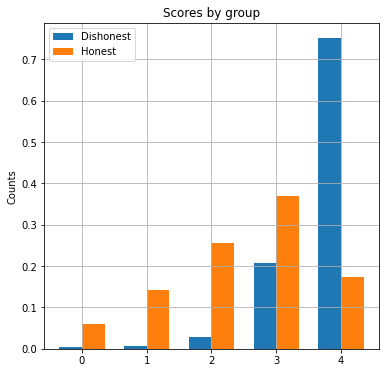

In [ ]:
 plot_scores(df)

It is importand to understand how the partecipand decide to change their answers, for this reason we report this plot.
It is possibile to see on the x-axis the variables, the y-axis the number answers.
* Blue: partecipants that changed the value of that answer, between honest and dishonest response. Around 175 out of 225.
* Orange: the partecipand that increased the value of the answer.
* Green: the partecipand that decreased the value of the answer.

Most of the partecipant increased the value of the response between honest and dishonest profile.

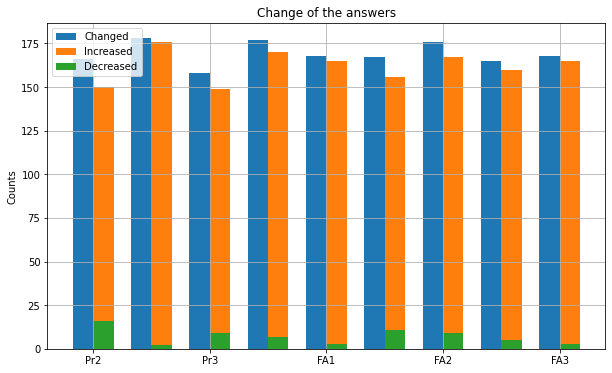

In [ ]:
(change,increased,decreased)=calculate_changes(df, features)
plot_changes(change,increased,decreased, features)

We rapresented the same using a radar plot, the behavior is about the same for all variables.

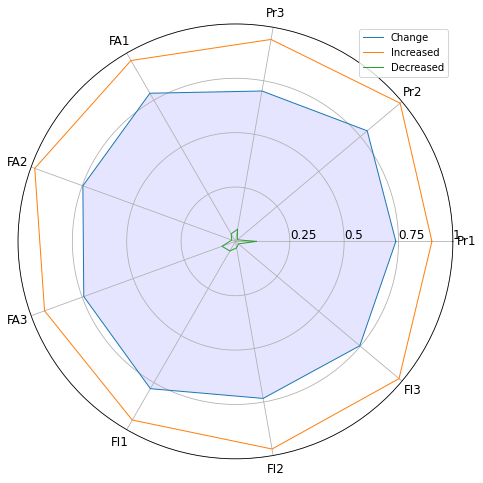

In [ ]:
(values,values2,values3)=calculate_values(change,increased,decreased)
plot_radar_plot(features,values,values2,values3)

In [ ]:
print('Of 225 partecipant there are: ')
print(str(int(sum(change)))+' questions changed, or the ' +str(round((sum(change))/225*9,1))+'%')
print(str(int(sum(increased))) +' questions increased, or the ' +str(round((sum(increased))/225*9,1))+'%')
print(str(int(sum(decreased))) +' questions decreased, or the ' +str(round((sum(decreased))/225*9,1))+'%')

Of 225 partecipant there are: 
1523 questions changed, or the 60.9%
1458 questions increased, or the 58.3%
65 questions decreased, or the 2.6%


We wondered if all attendees had followed the instructions provided, we thought that is some partecipant used the same value for all the answers they were lazy. We are not interested in this kind of data, we call this kind of partecipants cheaters. 

We selected the threshold of 7 equal answers to discriminate a participant as a cheater and we found 12 partecipants. 

In [ ]:
# IDEA check if some partecipant didn't respect the instructions, for example if they didn't change the answers 

In [ ]:
df = pd.read_csv("IADQ_df.csv")

In [ ]:
df_h = df.loc[df.CONDITION == "H",:]
df_d = df.loc[df.CONDITION == "D",:]

In [ ]:
cheater_H=[]
for i in range(0, len(df_h)): #select a partecipant
  count=0
  for j in range(0, len(features)): #select the feature
    if df_h.iloc[i,j]==df_d.iloc[i,j]: 
      count+=1
  if count>6:#len(features)//2
    cheater_H.append(i)

In [ ]:
print('Partecipant that answered using 7 times or more the same number: '+str(len(cheater_H))) #this one didn't change most of the answers, didn't understand the assigment

Partecipant that answered using 7 times or more the same number: 12


In [ ]:
cheater_D=[i+225 for i in cheater_H] #select the dishonest answers of the cheaters 

Text(0, 0.5, 'Score')

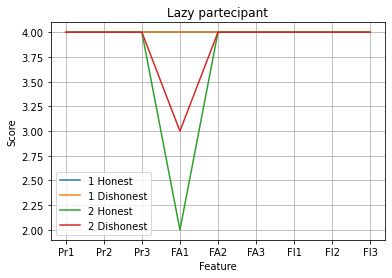

In [ ]:
#example of a partecipant that didn't follow the assigment

plt.title('Lazy partecipant')
plt.plot(df.iloc[cheater_H[0]][features], label='1 Honest')
plt.plot(df.iloc[cheater_D[0]][features], label='1 Dishonest')

plt.plot(df.iloc[cheater_H[2]][features], label='2 Honest')
plt.plot(df.iloc[cheater_D[2]][features], label='2 Dishonest')


plt.legend()
plt.grid()
plt.xlabel('Feature')
plt.ylabel('Score')

In [ ]:
# Remove useless data 
df.drop(cheater_D+cheater_H, inplace=True)
print('We remain with a total of '+str(len(df))+' rows.')

We remain with a total of 426 rows.


In [ ]:
X = df.iloc[:,0:9]
y = df.CONDITION

df_H = df.loc[df.CONDITION == "H",:]
df_D = df.loc[df.CONDITION == "D",:]

We report the correlation matrix among the variables that we will use for the classification and the recostruction.

All the variables are highly correlate, all between 0.6 and 0.8 .

In [ ]:
feat=['Pr1','Pr2','Pr3','FA1','FA2','FA3','FI1','FI2','FI3','CONDITION']

heatmap_matrix (df, 'Heatmap', feat)

Using the whole dataset we can try to use the K-means algorithm to check if we can define 2 distinct clusters that represent respectively the "Honest" group and the "Dishonest" group. In addition, using a clustering based on the centroids we can obtain the representative profile for each cluster.

In [ ]:
df_clust = df.copy().iloc[:,0:9]
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_clust)
print(pd.DataFrame(kmeans.cluster_centers_.round(), index = ["Repr. Honest", "Repr. Dishonest"], columns=df_clust.columns))

                 Pr1  Pr2  Pr3  FA1  FA2  FA3  FI1  FI2  FI3
Repr. Honest     2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
Repr. Dishonest  4.0  4.0  4.0  3.0  4.0  4.0  4.0  4.0  4.0


In [ ]:
print("Accuracy:", accuracy_score(np.where(df.CONDITION=="H",0,1), np.array(kmeans.labels_)))

Accuracy: 0.7699530516431925


With this simple unsupervised technique we can already observe that there is structure within the dataset that is to be modeled. The algorithm classifies in 2 groups already in an appreciable way.

## Experiments

### 1.   Estimation of the Number of Faked Responses out of the Total Number of Questions

The aim of the section is to use a regression model that received as input the answers given by a "Dishonest" user, and then is able to provide the number of answers with an increased score,  an unchanged score and decreased score compared to its "Honest" counterpart. The aim is to estimate the total number of falsified answers out of the total number of questions in the questionnaire, but without specifying which questions are falsified.<br> To do this, it will be necessary to do some data pre-processing to prepare an ad-hoc dataset to train this type of model. A peculiarity of this section is that we will have to use a class of models called multi-output regressors, that receive training set observations as input and return 2 or more output values. In the figure below we represent a useful diagram that illustrates the operation of this type of models. In this section we will use 3 multi-output regression models: Linear Multi-Output Regression, SVR Multi-Output Regression and Gradient Boosting Multi-Output Regression.

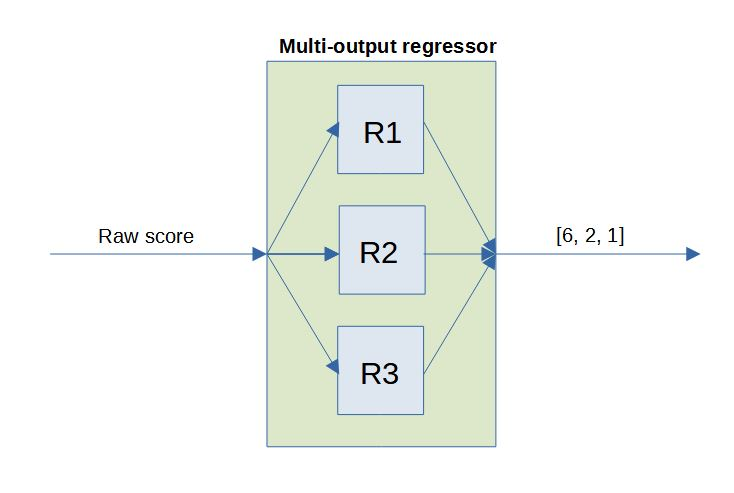

First we pre-allocate and fill the new columns that we are going to use to train the models and then to predict. They represent respectively:
* Number of Increases 
* Number of Equal
* Number of Decreases

In [ ]:
### Dataframe Modified ###

df_est = df.copy()

df_est['Inc'], df_est['Eq'], df_est['Dec'] = 0, 0, 0

df_est.loc[df_est.CONDITION=="D", "Inc"] = (df_est.loc[df_est.CONDITION=="D",:].iloc[:,0:9].to_numpy() > df_est.loc[df_est.CONDITION=="H",:].iloc[:,0:9].to_numpy()).sum(axis=1)
df_est.loc[df_est.CONDITION=="D", "Eq"] = (df_est.loc[df_est.CONDITION=="D",:].iloc[:,0:9].to_numpy() == df_est.loc[df_est.CONDITION=="H",:].iloc[:,0:9].to_numpy()).sum(axis=1)
df_est.loc[df_est.CONDITION=="D", "Dec"] = (df_est.loc[df_est.CONDITION=="D",:].iloc[:,0:9].to_numpy() < df_est.loc[df_est.CONDITION=="H",:].iloc[:,0:9].to_numpy()).sum(axis=1)
df_est.loc[df_est.CONDITION=="H", "Eq"] = 9

print(df_est.head())

   Pr1  Pr2  Pr3  FA1  FA2  FA3  FI1  FI2  FI3 CONDITION  Inc  Eq  Dec
0    4    2    3    2    2    2    2    2    1         H    0   9    0
1    2    3    2    3    2    1    3    2    3         H    0   9    0
2    4    3    3    4    4    4    3    3    3         H    0   9    0
3    3    3    2    1    3    2    3    2    3         H    0   9    0
4    3    2    2    3    3    3    4    3    3         H    0   9    0


It may be interesting to check how many increases, decreases and non-variations there are on average for each user of the questionnaire. <br>We will see that each "Dishonest" user fakes 7 answer (i.e. increase in the score), on average.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_est.iloc[:,0:10], df_est.iloc[:,10:13], test_size=0.25, random_state=42)

# Estimation on the training set of average number of Inc, Eq, Dec
index_D = list(set(X_train.loc[X_train.CONDITION=="H",:].index).intersection(set(X_train.loc[X_train.CONDITION=="D",:].index-213)))
index_D = np.array(index_D)

print("Average number of increases for each user in the sample:", (X_train.loc[index_D+213].iloc[:,0:9].to_numpy() > X_train.loc[index_D].iloc[:,0:9].to_numpy()).sum(axis=1).mean().round())
print("Average number of unchanged for each user in the sample:", (X_train.loc[index_D+213].iloc[:,0:9].to_numpy() == X_train.loc[index_D].iloc[:,0:9].to_numpy()).sum(axis=1).mean().round())
print("Average number of unchanged for each user in the sample:", (X_train.loc[index_D+213].iloc[:,0:9].to_numpy() < X_train.loc[index_D].iloc[:,0:9].to_numpy()).sum(axis=1).mean().round())

Average number of increases for each user in the sample: 7.0
Average number of unchanged for each user in the sample: 2.0
Average number of unchanged for each user in the sample: 0.0


In [ ]:
# New pre-allocation to train/test the model
df_est['Inc'], df_est['Eq'], df_est['Dec'] = 0, 0, 0

df_est.loc[df_est.CONDITION=="D", "Inc"] = (df_est.loc[df_est.CONDITION=="D",:].iloc[:,0:9].to_numpy() > df_est.loc[df_est.CONDITION=="H",:].iloc[:,0:9].to_numpy()).sum(axis=1)
df_est.loc[df_est.CONDITION=="D", "Eq"] = (df_est.loc[df_est.CONDITION=="D",:].iloc[:,0:9].to_numpy() == df_est.loc[df_est.CONDITION=="H",:].iloc[:,0:9].to_numpy()).sum(axis=1)
df_est.loc[df_est.CONDITION=="D", "Dec"] = (df_est.loc[df_est.CONDITION=="D",:].iloc[:,0:9].to_numpy() < df_est.loc[df_est.CONDITION=="H",:].iloc[:,0:9].to_numpy()).sum(axis=1)
df_est.loc[df_est.CONDITION=="H", "Eq"] = 9

So let's see an example of how the dataset we use to train the model is represented:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_est.iloc[:,0:10], df_est.iloc[:,10:14], test_size=0.25, random_state=42)

X_train.replace({"CONDITION":{"H":0, "D":1}}, inplace=True)
X_test.replace({"CONDITION":{"H":0, "D":1}}, inplace=True)

print(X_train.head(), "\n")
print(y_train.head())

     Pr1  Pr2  Pr3  FA1  FA2  FA3  FI1  FI2  FI3  CONDITION
320    4    4    4    4    4    4    4    4    4          1
3      3    3    2    1    3    2    3    2    3          0
18     1    2    1    1    2    1    2    4    1          0
344    3    4    4    4    4    4    4    4    3          1
62     2    3    3    3    2    1    1    2    2          0 

     Inc  Eq  Dec
320    4   5    0
3      0   9    0
18     0   9    0
344    5   4    0
62     0   9    0


We have chosen to use 75% of the observations in the training set; in the test set the remaining 25%. These ratios, used very commonly, allow us a sufficient proportion of data in the training phase and a representative test set.

#### Linear Multi-Output Regression

First we use the simplest regression model, the linear regression. This model can give us useful information on what the baseline performance of the problem may be.

In [ ]:
lmr = MultiOutputRegressor(LinearRegression())

lmr.fit(X_train, y_train)

y_model_pred = pd.DataFrame(lmr.predict(X_test).round(), index = y_test.index, columns = y_test.columns)
y_model_pred.loc[(y_model_pred.sum(axis=1) != 9) & (y_model_pred.Inc < 0), "Inc"] = 0 # Select negative values in Inc and set to 0
y_model_pred.loc[(y_model_pred.sum(axis=1) < 9), "Inc"] = y_model_pred.loc[(y_model_pred.sum(axis=1) < 9), "Inc"] + 1 # If the sum is different from 9, add 1 to Inc
y_model_pred.loc[(y_model_pred.sum(axis=1) > 9), "Inc"] = y_model_pred.loc[(y_model_pred.sum(axis=1) > 9), "Inc"] - 1

print("RMSE on the training set:", (mean_squared_error(y_train, lmr.predict(X_train).round())**(1/2)))
print("RMSE on the test set:", (mean_squared_error(y_test, lmr.predict(X_test).round())**(1/2)))

RMSE on the training set: 1.2804290033429737
RMSE on the test set: 1.038210778184129


#### SVR Multi-Output Regression

Now let's use SVR to solve the regression problem. Since there are hyper-parameters to optimize, we use an approach called grid-search which does this automatically.

In [ ]:
## Computing time for grid search =~ 15 min ##

# svr = MultiOutputRegressor(SVR())
# param_grid = {'estimator__kernel':['linear', 'poly', 'rbf'],
#               'estimator__degree':[3, 4, 5],
#               'estimator__C':[0.1, 1, 10]}
# gscv = GridSearchCV(svr, param_grid)
# gscv.fit(X_train, y_train)
# print(gscv.best_params_)

In [ ]:
svr = MultiOutputRegressor(SVR(kernel='rbf', degree=3, C=10))

svr.fit(X_train, y_train)

y_model_pred = pd.DataFrame(svr.predict(X_test).round(), index = y_test.index, columns = y_test.columns)
y_model_pred.loc[(y_model_pred.sum(axis=1) != 9) & (y_model_pred.Inc < 0), "Inc"] = 0 # Select negative values in Inc and set to 0
y_model_pred.loc[(y_model_pred.sum(axis=1) < 9), "Inc"] = y_model_pred.loc[(y_model_pred.sum(axis=1) < 9), "Inc"] + 1 # If the sum is different from 9, add 1 to Inc
y_model_pred.loc[(y_model_pred.sum(axis=1) > 9), "Inc"] = y_model_pred.loc[(y_model_pred.sum(axis=1) > 9), "Inc"] - 1

print("RMSE on the training set:", (mean_squared_error(y_train, svr.predict(X_train).round())**(1/2)))
print("RMSE on the test set:", (mean_squared_error(y_test, svr.predict(X_test).round())**(1/2)))


RMSE on the training set: 1.2090740172137346
RMSE on the test set: 1.1800522719295028


#### Gradient Boosting Multi-Output Regression

In [ ]:
## Computing time for grid search =~ 10 min ##

# gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
# param_grid = {'estimator__n_estimators':[20, 50, 75],
#               'estimator__learning_rate':[0.01, 0.05, 0.1],
#               'estimator__max_depth':[1, 2, 3],
#               'estimator__min_samples_split':[3, 4, 5]}
# gscv = GridSearchCV(gbr, param_grid)
# gscv.fit(X_train, y_train)
# print(gscv.best_params_)

In [ ]:
gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=50,
                                                     learning_rate=0.05,
                                                     max_depth=3,
                                                     min_samples_split=3,
                                                     random_state=42))
gbr.fit(X_train, y_train)

y_model_pred = pd.DataFrame(gbr.predict(X_test).round(), index = y_test.index, columns = y_test.columns)
y_model_pred.loc[(y_model_pred.sum(axis=1) != 9) & (y_model_pred.Inc < 0), "Inc"] = 0 # Select negative values in Inc and set to 0
y_model_pred.loc[(y_model_pred.sum(axis=1) < 9), "Inc"] = y_model_pred.loc[(y_model_pred.sum(axis=1) < 9), "Inc"] + 1 # If the sum is different from 9, add 1 to Inc
y_model_pred.loc[(y_model_pred.sum(axis=1) > 9), "Inc"] = y_model_pred.loc[(y_model_pred.sum(axis=1) > 9), "Inc"] - 1

print("RMSE on the training set:", (mean_squared_error(y_train, gbr.predict(X_train).round())**(1/2)))
print("RMSE on the test set:", (mean_squared_error(y_test, gbr.predict(X_test).round())**(1/2)))

RMSE on the training set: 1.1551529186271174
RMSE on the test set: 1.0246190690984258


As we can see, the best performance are returned by the Gradient Boosting model, but pretty similar to the performance of Linear Multi-Output Regression. After having made several attempts and experimented with various approaches, it is not possible to obtain significantly better results compared to these performances. So let's look at an example of model predictions:

In [ ]:
print(y_model_pred.head())

     Inc   Eq  Dec
442  7.0  2.0  0.0
78   0.0  9.0  0.0
188  0.0  9.0  0.0
30   0.0  9.0  0.0
379  6.0  3.0  0.0


### Comparison Among the Models

The following table presents, in summary, RMSE measured on the test of the 3 different models used.

Model | RMSE
-------------------|------------------
Linear M-O       | $1.038$  
SVR M-O      |  $1.180$ 
Gradient Boosting MO |  $1.024$


### 2. Classification Between Honest and Dishonest

In this section we will explore the classification between the honest and the dishonest partecipant. We applied use classification methods like the Logistic Regression, a Decision Tree, the KNN and an AdaBoost Classifier.

We report the models and the performance over the train and the test sample formed bt 25% of the total data. The remaining 75% will be used for the training of the model. 

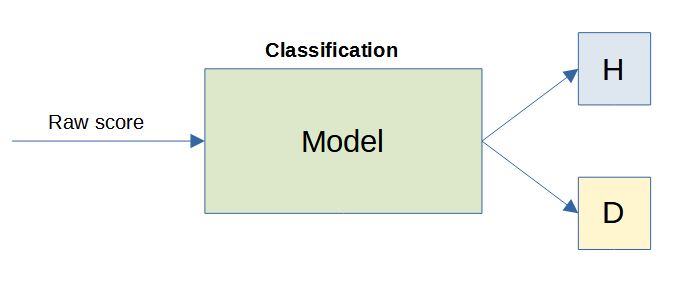

In [ ]:
#df = pd.read_csv("IADQ_df.csv")
X = df.iloc[:,0:9]
y = df.CONDITION

df_H = df.loc[df.CONDITION == "H",:]
df_D = df.loc[df.CONDITION == "D",:]

#we split the train and the test data
#we will use the 15% of the data as test and the 85% as train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)

#### Logistic Regression

The first model we will use is the logistic regression, it is always useful to start using simple models and then increasing the complexity. 
The main hyperparametere is the regularitation strength C, the role can be seen in the cost function below:
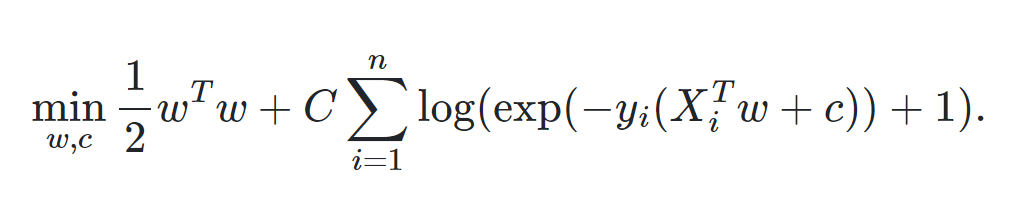

In [ ]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

print("Accuracy on the training set: " + str(lr.score(X_train, y_train)))
print("Accuracy on the test set: "+ str(lr.score(X_test, y_test)))

Accuracy on the training set: 0.8674033149171271
Accuracy on the test set: 0.890625


For each model we performed a grid search to find the best combination of the parameters in this case we select:
- C: regularitation strenght
- Solver
- Number of iterations

In [ ]:

C_values=np.array([1.e-08, 1.e-06, 1.e-04, 1.e-02,1.e+00, 1.e+02, 1.e+04, 1.e+06,1.e+08, 1.e+10])
lr=LogisticRegression()
parameters = {'solver':('lbfgs','liblinear'), 'C':C_values, 'max_iter':[100,500,1000]}
clf = GridSearchCV(lr, parameters, return_train_score=True)
clf.fit(X_train, y_train)

df_grid_search=pd.DataFrame(clf.cv_results_)
best_lr=clf.best_estimator_
print(clf.best_estimator_.get_params())
best_score=clf.best_score_

print("score on test: " + str(best_lr.score(X_test, y_test)))
print("score on train: "+ str(best_lr.score(X_train, y_train)))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
score on test: 0.890625
score on train: 0.8674033149171271


#### Decision Trees

As second model we studied a desicion tree and performed the same kink of analysis, below are reported the results for the grid search procedure. In this case the main parametere studied is the depth of the tree. 

In [ ]:
dtc = DecisionTreeClassifier()

max_depth = np.array([1,10, 100, 1000,2000, None])
parameters = {"criterion" : ("gini","entropy"), 
              "max_depth" : max_depth, 
              "class_weight" : ("balanced", None)}
clf = GridSearchCV(dtc, parameters)
clf.fit(X_train, y_train)

best_dtc = clf.best_estimator_
best_score = clf.best_score_

print("Accuracy on the training set: " + str(best_dtc.score(X_train, y_train)))
print("Accuracy on the test set: "+ str(best_dtc.score(X_test, y_test)))

Accuracy on the training set: 0.8480662983425414
Accuracy on the test set: 0.8125


Using a decision tree is udeful to understand which features play a bigger role in the classification task, for this reason we trained a non-optimized model and plotted the features importance with the following evidence:
* FA2 is the most useful feature
* Pr2 and FI1 follow

Accuracy on the training set: 0.9806629834254144
Accuracy on the test set: 0.875


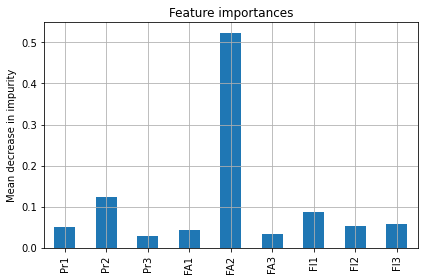

In [ ]:
dtc.fit(X_train,y_train)

print("Accuracy on the training set: " + str(dtc.score(X_train, y_train)))
print("Accuracy on the test set: "+ str(dtc.score(X_test, y_test)))

importances = dtc.feature_importances_

forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
ax.grid()

In [ ]:
import graphviz

It is interesting to plot the decision tree studied, in this case we limited the depth to 3 for a better representation.
The theshold for the values of each features is 3.5 out of 4, a very high theshold. The first variable used is the FA2 and then FI1 and Pr2, using 3.5 as a theshold for the discrimination. For the variable FI3 the theshold is 1.5. 
In the end we find the leaf of the tree with the relative value of the gini index associated. 

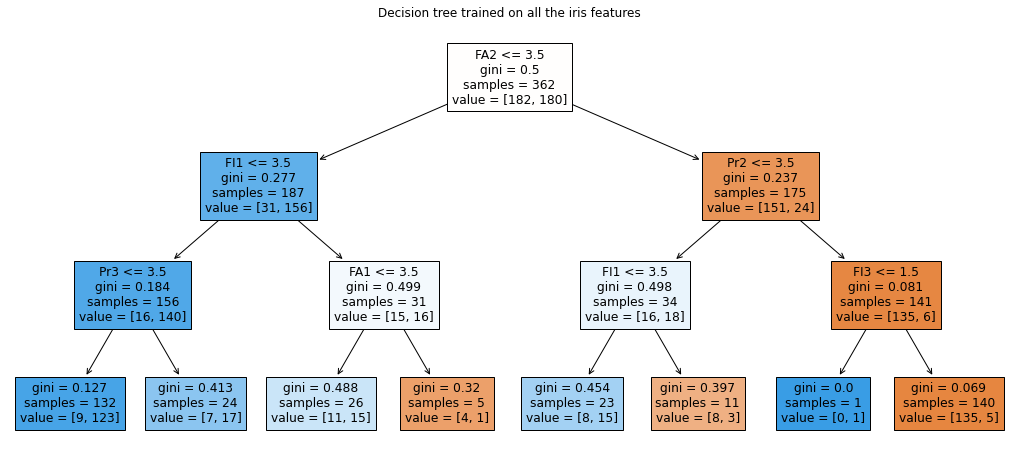

In [ ]:
from sklearn.tree import plot_tree
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(18,8))
plot_tree(dtc ,filled=True, feature_names=features)
plt.title("Decision tree trained on all the iris features")
plt.show()

#### Random Forest

To improve the performance of the decision tree it is useful to study the random forest that is a ensemble model. In this case the model train different trees and than compute the performance using all the diferent estimators, in this way we reduce the variance of the forest estimator. We performed the grid search looking for:
* Criterion: the criterion used to discrimninated the classes
* Depth: depth of each tree
* Estimators: number of trees used to built the forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(random_state=0)

max_depth = np.array([ 100, 1000,2000, None])
n_estimators= np.array([10, 50, 100, 200,500])

parameters = {"criterion" : ("gini","entropy"), 
              "max_depth" : max_depth, 
              "class_weight" : ("balanced", None)}

clf = GridSearchCV(RF, parameters)
clf.fit(X_train, y_train)

best_RF = clf.best_estimator_
best_score = clf.best_score_

print("score on test: " + str(best_RF.score(X_test, y_test)))
print("score on train: "+ str(best_RF.score(X_train, y_train)))

score on test: 0.875
score on train: 0.9806629834254144


Also in this case the most important variable is FA2, but both FI1 and Pr2 increased their importance. The black lines in the plot indicate the variance for each feature importance score. 

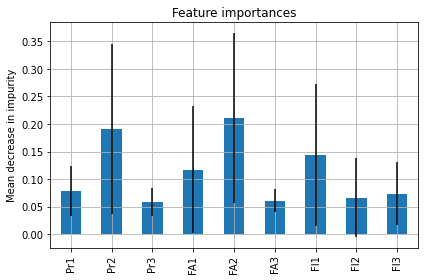

In [ ]:
importances = best_RF.feature_importances_

forest_importances = pd.Series(importances, index=features)
std = np.std([tree.feature_importances_ for tree in best_RF.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar( yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
ax.grid()


####KNN

To study a non-parametric model we selected the KNN, and perfomed the cross validation over the following parameters of the model:
* Number of neighbors
* Type of weights
* Algorithm for the resolution
* Type of distance (p)

In [ ]:
n_n=np.array([1,2,3,4,5,6,7,8,9,10])
knn = KNeighborsClassifier()
p_values=[1,2,3,4]
parameters = {'weights':('uniform','distance'), 'algorithm':('ball_tree','brute'), 'n_neighbors':n_n, 'p':p_values}
clf = GridSearchCV(knn, parameters, return_train_score=True)
clf.fit(X_train, y_train)

df_grid_search=pd.DataFrame(clf.cv_results_)
best_knn=clf.best_estimator_
print(clf.best_estimator_.get_params())
best_score=clf.best_score_

print("score on test: " + str(best_knn.score(X_test, y_test)))
print("score on train: "+ str(best_knn.score(X_train, y_train)))

{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
score on test: 0.890625
score on train: 0.8729281767955801


In the following plot we can see the score on the training and test set for different values of the number of neighbors used for the classification. We are in an overfitting regime which seems to stabilize.

Text(0.5, 1.0, 'Score Vs Neighbors')

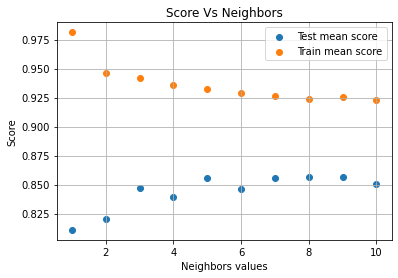

In [ ]:
plt.scatter(n_n, [df_grid_search[df_grid_search['param_n_neighbors']==N]['mean_test_score'].mean() for N in n_n], label='Test mean score')
plt.scatter(n_n, [df_grid_search[df_grid_search['param_n_neighbors']==N]['mean_train_score'].mean() for N in n_n], label='Train mean score')

plt.legend()
plt.grid()
plt.xlabel('Neighbors values')
plt.ylabel('Score')
plt.title('Score Vs Neighbors')

#### AdaBoost

Finally we used a very powerful model, the AdaBoost classifier. It is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=15,max_depth=4),n_estimators=10,learning_rate=0.2)

adb.fit(X_train, y_train)

print("Accuracy on the training set:" + str(adb.score(X_train, y_train)))
print("Accuracy on the test set:" + str(adb.score(X_test, y_test)))

Accuracy on the training set:0.930939226519337
Accuracy on the test set:0.90625


### Comparison Among the Models

The confusion matrix is one of the best way to see the performance of the models. We want a model that predict very well the distinction among the classes but in particular we want to monitorate the False Positive versus the False Negative.

Despite the KNN is in overfitting it shows a good performance and a lower false positive and false negative rates. 


In [ ]:
def plot_confusion_matrix(Y, X, model, ax):
  cm = confusion_matrix(Y, model.predict(X))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Dishonest', 'Predicted Honest'))
  ax.yaxis.set(ticks=(0, 1), ticklabels=('Dishonest', 'Honest'))
  ax.set_ylim(1.5, -0.5)
  for i in range(2):
      for j in range(2):
         ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

def plot_learning_curves(model,title,ax,x_train,y_train):
  train_size,train_scores,val_scores=learning_curve(model,x_train,y_train,cv=5)

  train_scores_plot=np.mean(train_scores,axis=1)
  val_scores_plot=np.mean(val_scores,axis=1)

  ax.plot(train_size,train_scores_plot,marker='*',label='Train')
  ax.plot(train_size,val_scores_plot,marker='.',label='Validation')
  ax.set_xlabel('Size training sample')
  ax.set_ylabel('Accuracy of the model')
  ax.grid()
  ax.legend()
  ax.set_title('Learning Curves '+str(title))

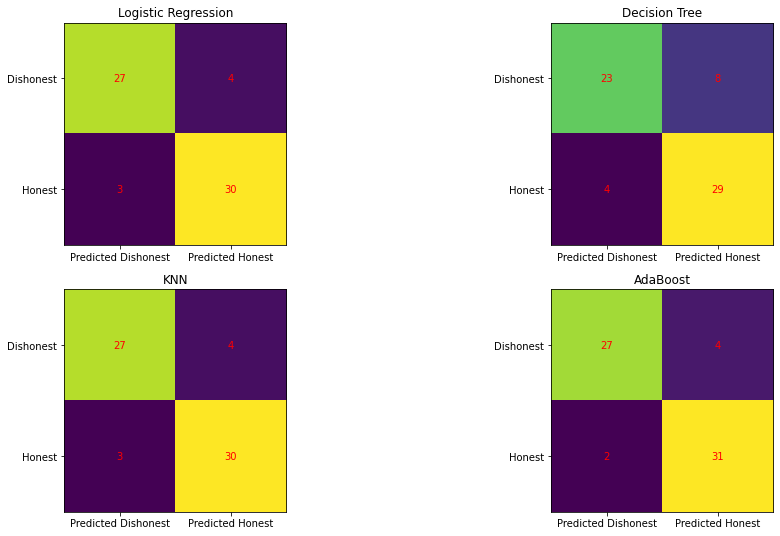

In [ ]:
fig,ax=plt.subplots(2,2, figsize=(16,9))

ax[0,0].set_title('Logistic Regression')
plot_confusion_matrix(y_test, X_test, best_lr, ax[0,0])
ax[0,1].set_title('Decision Tree')
plot_confusion_matrix(y_test, X_test, best_dtc, ax[0,1])
ax[1,0].set_title('KNN')
plot_confusion_matrix(y_test, X_test, best_knn, ax[1,0])
ax[1,1].set_title('AdaBoost')
plot_confusion_matrix(y_test, X_test, adb, ax[1,1])

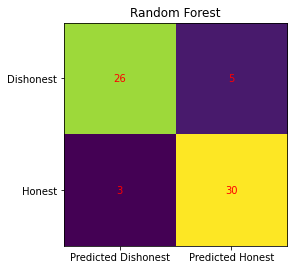

In [ ]:
fig,ax=plt.subplots(1,1, figsize=(4,5))
ax.set_title('Random Forest')
plot_confusion_matrix(y_test, X_test, best_RF, ax)

Potting the learning curve it is possible to see how the simpler models like the logistic regression and the decision tree aren't in a strong overfittig, the difference of the values of the accuracy of the models over the train and test set it almost reaches zero when we use all available data. Also for the KNN model. 

For the most complex models like the AdaBoost and the Random Forest classifiers we are in an overfitting regime, so surely the performance over the test set can be improve adding more data. 



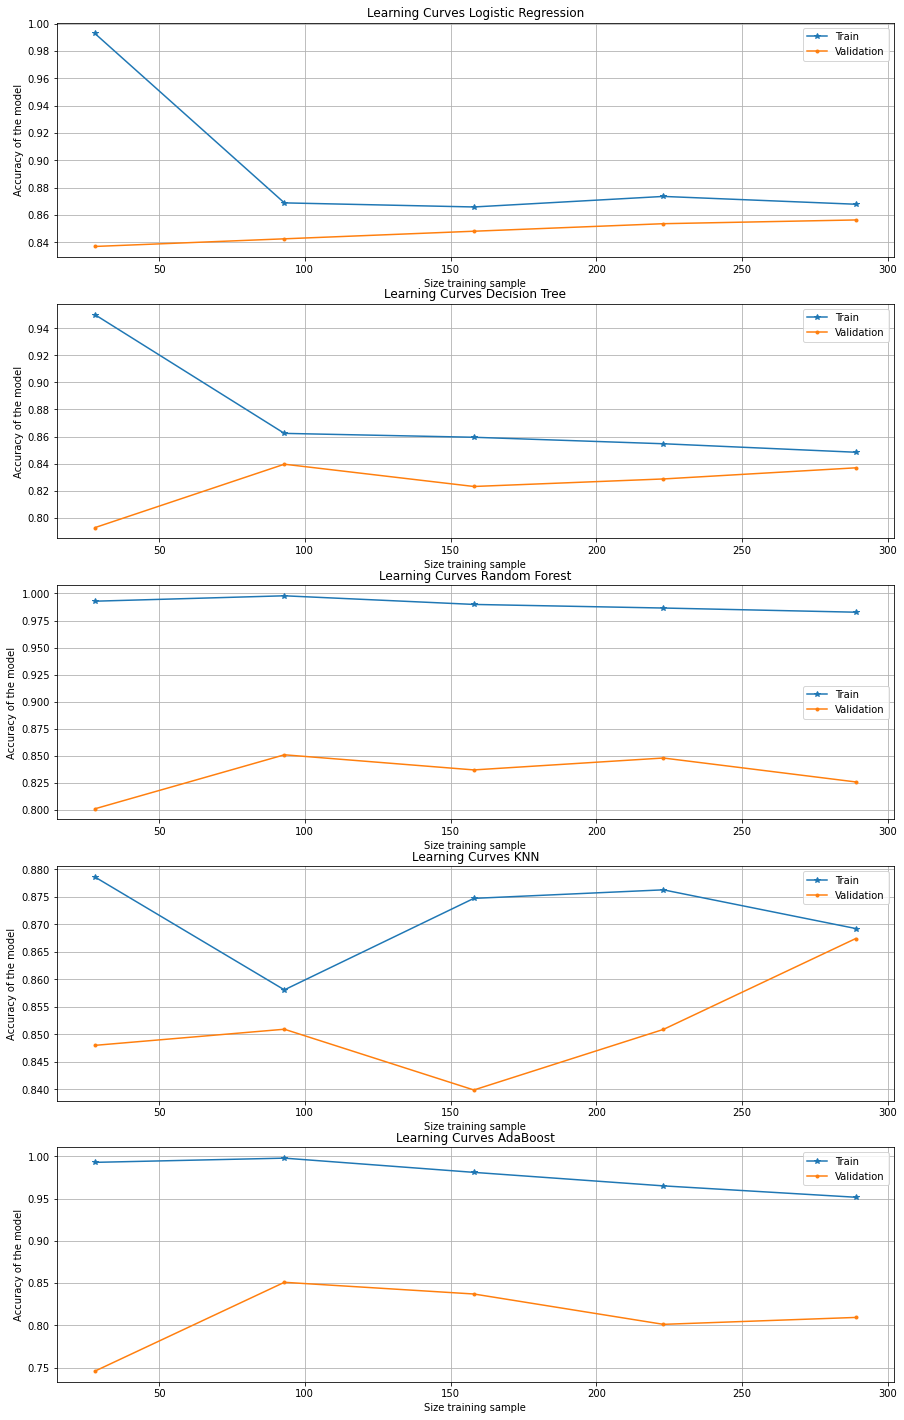

In [ ]:
fig,ax=plt.subplots(5,1,figsize=(15,25))

plot_learning_curves(best_lr,'Logistic Regression',ax[0], X_train,y_train)
plot_learning_curves(best_dtc,'Decision Tree',ax[1], X_train,y_train)
plot_learning_curves(best_RF,'Random Forest',ax[2], X_train,y_train)
plot_learning_curves(best_knn,'KNN',ax[3], X_train,y_train)
plot_learning_curves(adb,'AdaBoost',ax[4], X_train,y_train)

In the plot below we report all the performances of the models over the test set.

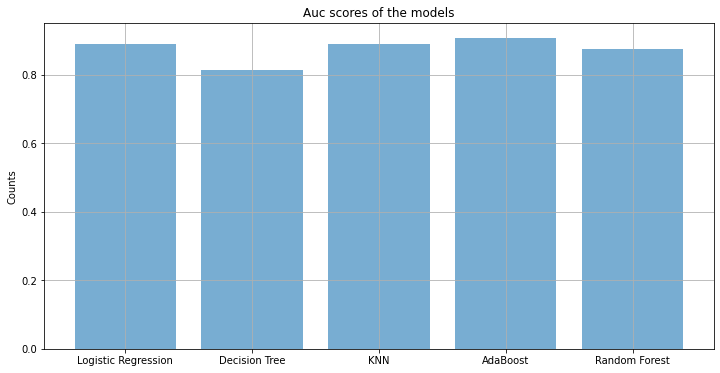

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
labels=['Logistic Regression','Decision Tree','KNN','AdaBoost','Random Forest']
auc_scores=[best_lr.score(X_test, y_test),best_dtc.score(X_test, y_test),best_knn.score(X_test, y_test),adb.score(X_test, y_test),best_RF.score(X_test, y_test)]
y_pos = np.arange(len(labels))

plt.bar(y_pos, auc_scores, alpha=0.6)
ax.set_ylabel('Counts')
ax.set_title('Accuracy scores of the models')
ax.set_xticks(y_pos)
ax.set_xticklabels(labels)
ax.grid()

To visualize all the models we reported the ROC curves, we can wee that the tree-based models perform quite well.

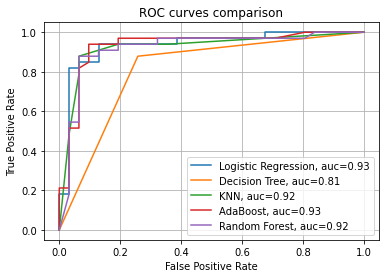

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import  metrics

X = df.iloc[:,0:9]
y = df.CONDITION

df_H = df.loc[df.CONDITION == "H",:]
df_D = df.loc[df.CONDITION == "D",:]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 42)

df=df.replace(to_replace='D', value=0)
df=df.replace(to_replace='H',value=1)

fpr_lr, tpr_lr, _lr = metrics.roc_curve(y_test,  best_lr.predict_proba(X_test)[::,1])
auc_lr = metrics.roc_auc_score(y_test, best_lr.predict_proba(X_test)[::,1])

fpr_dtc, tpr_dtc, _dtc = metrics.roc_curve(y_test,  best_dtc.predict_proba(X_test)[::,1])
auc_dtc = metrics.roc_auc_score(y_test, best_dtc.predict_proba(X_test)[::,1])

fpr_knn, tpr_knn, _knn = metrics.roc_curve(y_test,  best_knn.predict_proba(X_test)[::,1])
auc_knn = metrics.roc_auc_score(y_test, best_knn.predict_proba(X_test)[::,1])

fpr_adb, tpr_adb, _adb = metrics.roc_curve(y_test,  adb.predict_proba(X_test)[::,1])
auc_adb = metrics.roc_auc_score(y_test, adb.predict_proba(X_test)[::,1])

fpr_rfc, tpr_rfc, _rfc = metrics.roc_curve(y_test,  best_RF.predict_proba(X_test)[::,1])
auc_rfc = metrics.roc_auc_score(y_test, best_RF.predict_proba(X_test)[::,1])


plt.plot(fpr_lr,tpr_lr,label="Logistic Regression, auc="+str(round((auc_lr),2)))
plt.plot(fpr_dtc,tpr_dtc,label="Decision Tree, auc="+str(round((auc_dtc),2)))
plt.plot(fpr_knn,tpr_knn,label="KNN, auc="+str(round((auc_knn),2)))
plt.plot(fpr_adb,tpr_adb,label="AdaBoost, auc="+str(round((auc_adb),2)))
plt.plot(fpr_rfc,tpr_rfc,label="Random Forest, auc="+str(round((auc_rfc),2)))

plt.legend(loc=4)
plt.grid(True)
plt.title('ROC curves comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

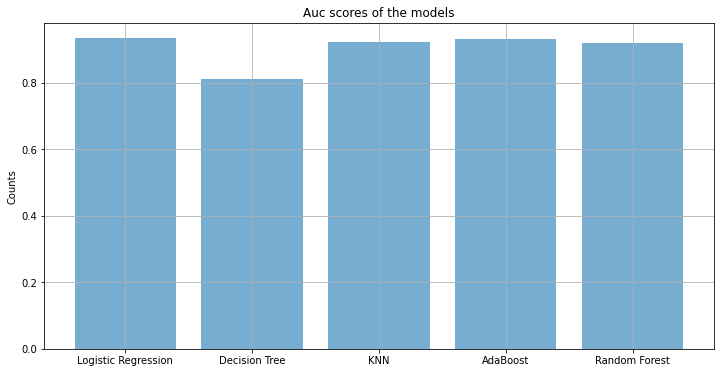

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
labels=['Logistic Regression','Decision Tree','KNN','AdaBoost','Random Forest']
auc_scores=[auc_lr,auc_dtc,auc_knn,auc_adb,auc_rfc]
y_pos = np.arange(len(labels))

plt.bar(y_pos, auc_scores, alpha=0.6)
ax.set_ylabel('Counts')
ax.set_title('Auc scores of the models')
ax.set_xticks(y_pos)
ax.set_xticklabels(labels)
ax.grid()

### Future Works: Classification Between Honest and Dishonest with Tf-Idf Scores as Covariates

It may be useful to use Tf-Idf function and calculate the associated scores in order to use additional covariate variables and use a more informative dataset. The Tf-Idf is a function used in Information Retrieval to measure the importance that a term has within a document or a collection of documents. Formally it is calculated through:
$$Tf-Idf(t,d,C) = Tf(d,t) * Idf(t,C)$$
Where:
* **C**: Collection of documents;
* **d**: Document where $d \in C$;
* **t**: Target term $t$ that appears in a document $t$.
In this context, this function can give us a measure of the importance a given answer has within the answers given by the user and the relative importance of his answer compared to all the answers given to that question by other users. As a guideline, we expect this functon to assume large values for very atypical responses.

---

As we will see, having a dataset that has the Tf-Idf scores for each questionnaire response will significantly improve the performance of almost all the models. However it is of fundamental importance to specify that since the calculation of Tf-Idf presupposes the knowledge that the user is "Honest" or "Dishonest" in some way **we are already suggesting to the models the class that the user belong to**, even in the test set. This cannot be done in a real-world scenario. However the purpose of this sub-section is to show the potential of this technique by having a correct way to estimate Tf-Idf scores even on new users, without knowing if they are "Honest" or "Dishonest". This may be interesting to develop in future works.

In [ ]:
def tf_idf_DataFrame(data):

  tf_mat = np.zeros_like(data); idf_mat = np.zeros_like(data)

  for i in range(data.shape[0]):
    tf = 0; idf = 0
    for j in range(data.shape[1]):
      tf = list(data.iloc[i,:]).count(data.iloc[i,j])
      idf = list(data.iloc[:,j]).count(data.iloc[i,j])
      tf_mat[i,j] = tf; idf_mat[i,j] = idf
  
  tf_idf_mat = tf_mat * np.log10(data.shape[0]/idf_mat)
  
  data_tf_idf_columns = [i + "_ti" for i in data.columns]

  data_tf_idf = pd.DataFrame(tf_idf_mat, index = data.index, columns = data_tf_idf_columns)
  data = data.join(data_tf_idf)
  
  return data

In [ ]:
new_df = pd.read_csv("new_IADQ_df.csv") #For shortness, we load the dataset with the associated Tf-Idf scores
new_df.drop(cheater_D+cheater_H, inplace=True) # Remove lazy participants

new_X = new_df.iloc[:,0:18]
new_y = new_df.CONDITION

#we split the train and the test data
#we will use the 15% of the data as test and the 85% as train

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, train_size = 0.85, random_state = 42)

#### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

print("Accuracy on the training set: " + str(lr.score(new_X_train, new_y_train)))
print("Accuracy on the test set: "+ str(lr.score(new_X_test, new_y_test)))

Accuracy on the training set: 0.8950276243093923
Accuracy on the test set: 0.9375


In [ ]:
C_values=np.array([1.e-08, 1.e-06, 1.e-04, 1.e-02,1.e+00, 1.e+02, 1.e+04, 1.e+06,1.e+08, 1.e+10])
lr=LogisticRegression()
parameters = {'solver':('lbfgs','liblinear'), 'C':C_values, 'max_iter':[100,500,1000]}
clf = GridSearchCV(lr, parameters, return_train_score=True)
clf.fit(new_X_train, new_y_train)

df_grid_search=pd.DataFrame(clf.cv_results_)
best_lr=clf.best_estimator_
print(clf.best_estimator_.get_params())
best_score=clf.best_score_

print("score on test: " + str(best_lr.score(new_X_test, new_y_test)))
print("score on train: "+ str(best_lr.score(new_X_train, new_y_train)))

{'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
score on test: 0.890625
score on train: 0.8535911602209945


#### Decision Trees

In [ ]:
dtc = DecisionTreeClassifier()

max_depth = np.array([1,10, 100, 1000,2000, None])
parameters = {"criterion" : ("gini","entropy"), 
              "max_depth" : max_depth, 
              "class_weight" : ("balanced", None)}
clf = GridSearchCV(dtc, parameters)
clf.fit(new_X_train, new_y_train)

best_dtc = clf.best_estimator_
best_score = clf.best_score_

print("Accuracy on the training set: " + str(best_dtc.score(new_X_train, new_y_train)))
print("Accuracy on the test set: "+ str(best_dtc.score(new_X_test, new_y_test)))

Accuracy on the training set: 1.0
Accuracy on the test set: 0.90625


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(random_state=0)

max_depth = np.array([ 100, 1000,2000, None])
n_estimators= np.array([10, 50, 100, 200,500])

parameters = {"criterion" : ("gini","entropy"), 
              "max_depth" : max_depth, 
              "class_weight" : ("balanced", None)}

clf = GridSearchCV(RF, parameters)
clf.fit(new_X_train, new_y_train)

best_RF = clf.best_estimator_
best_score = clf.best_score_

print("score on test: " + str(best_RF.score(new_X_test, new_y_test)))
print("score on train: "+ str(best_RF.score(new_X_train, new_y_train)))

score on test: 0.984375
score on train: 1.0


#### KNN

In [ ]:
n_n=np.array([1,2,3,4,5,6,7,8,9,10])
knn = KNeighborsClassifier()
p_values=[1,2,3,4]
parameters = {'weights':('uniform','distance'), 'algorithm':('ball_tree','brute'), 'n_neighbors':n_n, 'p':p_values}
clf = GridSearchCV(knn, parameters, return_train_score=True)
clf.fit(new_X_train, new_y_train)

df_grid_search=pd.DataFrame(clf.cv_results_)
best_knn=clf.best_estimator_
print(clf.best_estimator_.get_params())
best_score=clf.best_score_

print("score on test: " + str(best_knn.score(new_X_test, new_y_test)))
print("score on train: "+ str(best_knn.score(new_X_train, new_y_train)))

{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
score on test: 1.0
score on train: 1.0


#### Adaboost

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=15,max_depth=4),n_estimators=10,learning_rate=0.2)

adb.fit(new_X_train, new_y_train)

print("Accuracy on the training set:" + str(adb.score(new_X_train, new_y_train)))
print("Accuracy on the test set:" + str(adb.score(new_X_test, new_y_test)))

Accuracy on the training set:1.0
Accuracy on the test set:0.96875



## Reconstruction

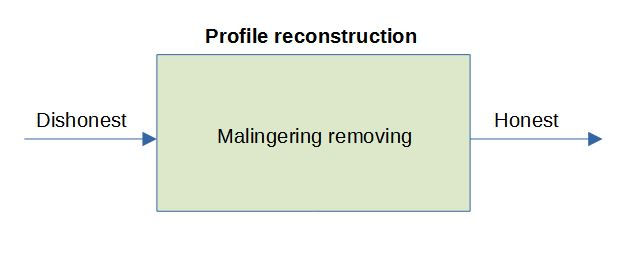

Before to start the Reconstruction we need a Baseline, and for that we implemented the **Average Remover**. This method aims to correct each malingered profile by subtracting the average score of the honest responses for each answer of the questionnaire.
<br>In the next cell there the implementation of the model with the risult: The Average Remover get an *Accuracy* of $35.6$ and a *Mean Squared Error* of $1.18$.

The accuracy is obtained in this way:

1.   Rounding the prediction to the close integer
2.   Calculating the difference between the predictions and the true data
3.   The total number of right predictions is the number of value $0$ obtained. For example if our method predicts $3.4$ (rounded to $3$) and the true value is $3$, then their difference is $0$
4. Finally Accuracy is calculated in the simplest way: 

<img src='https://drive.google.com/uc?id=1bu6OXrjvZXmDBrvIuxKR8XIH3LILjRDm' width=400px height>


---


Code related:

1.   `np.round(y_pred)`
2.   `ar=np.round(y_pred)-np.round(y_true)`
3.  `tot=(ar==0).sum(axis=0).sum()`
4.`tot/y_true.shape[0])*100`





The general idea for this project is illustrated in the next paragraphs, but here we add a schema in order to visulize in a better way the process flow.
The project follows this order:


*      Generate new data with Bayesian Network
  *   Deep Learning methods:
        *   Autoencoder
        * DBN
        * RNN and LSTM
*   BruteForce Method
* One Class SVM


---


To be clear the generated data is used for Deep Learning models only.
Every paragraph contains an thorough explanation of the methods.<br>


---


The Final result of all the models is in the paragraph **Final Result**


---
We also provided a little demo as a web app (builted with *Streamlit*) in the paragraph **Demo**






In order to create a clean notebook for this section all the  principal functions come from a library.py we create. In particular:


Paragraph  | Library.py 
-------------------|------------------
Generate Samples from DAG       | *generatesamples.py* 
Autoencoder      | *autoencoder.py*
DBN |*dbn_rnn_lstm.py*
RNN and LSTM |*dbn_rnn_lstm.py*
BruteForce |*reconstruction.py*




#### Average removing

In [ ]:
#### Baseline to beat ####
def average_removing(df_honest,df_dishonest, dishonest):
  '''
  baseline to beat
  '''
  stats_honest=df_honest.describe()
  stats_dishonest=df_dishonest.describe()

  mean_h=stats_honest.loc['mean'].to_numpy()
  mean_dis=stats_dishonest.loc['mean'].to_numpy()

  return dishonest-(mean_dis-mean_h)

pred = average_removing(df_honest,df_dishonest, dishonest)
res = my_accuracy_old(pred, honest)
print("Result Average Remover")
pd.DataFrame(data=[[res[0], res[1]]], columns=['Accuracy', 'MSE'])


Result Average Remover


,Accuracy,MSE
0,35.555556,1.181282


#### Bayesian network



Looking at the dataset we can see that we have not so many examples: 225 people that fake and 225 that are honest. The idea is to generate new samples in order to use them and create more efficient models. In this case **Bayesian Networks**(*BNs*) could be a valid starting point. <br>**BNs** are a type of probabilistic graphical model that uses Bayesian inference for probability computations. <br>**Bayesian networks** aim to model conditional dependence, and therefore **Causation**, by representing conditional dependence by edges in a directed graph.
<br>A Bayesian network node corresponds to a unique random variable. Formally, if an edge $(A, B)$ exists in the graph connecting random variables $A$ and $B$, it means that  is a factor in the joint probability distribution, so we must know $P(B|A)$ for all values of $B$ and $A$ in order to conduct inference. <br>In the below example, since $Rain$ has an edge going into $WetGrass$, it means that $P(WetGrass|Rain)$ will be a factor, whose probability values are specified next to the $WetGrass$ node in a conditional probability table.

![An image](https://miro.medium.com/max/602/1*9OsQV0PqM2juaOtGqoRISw.jpeg)


<br><br> In this paragraph there are some plots of the bayesian network related to the data. In order to learn the DAG (Directed Acyclic Graph) we used the library `bnlearn` and we fit the the method  `bnlearn.structure_learning` with the data. In this way we have created the DAG for the *dishonest*, *honest* and for both *dishonest and honest together*


In [ ]:
# !pip install bnlearn

In [ ]:
######### Creating all DAG #########################

import bnlearn as bn

DAG_honest = bn.structure_learning.fit(df_honest)
DAG_dishonest = bn.structure_learning.fit(df_dishonest)
DAG_all = bn.structure_learning.fit(df.iloc[:, :])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


In [ ]:
# !pip install pyvis

params_static = {'width':15, 'height':8, 'font_size':18, 'font_family':'times new roman', 'alpha':0.3, 'node_shape':'o', 'facecolor':'white', 'font_color':'#000000'}


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.


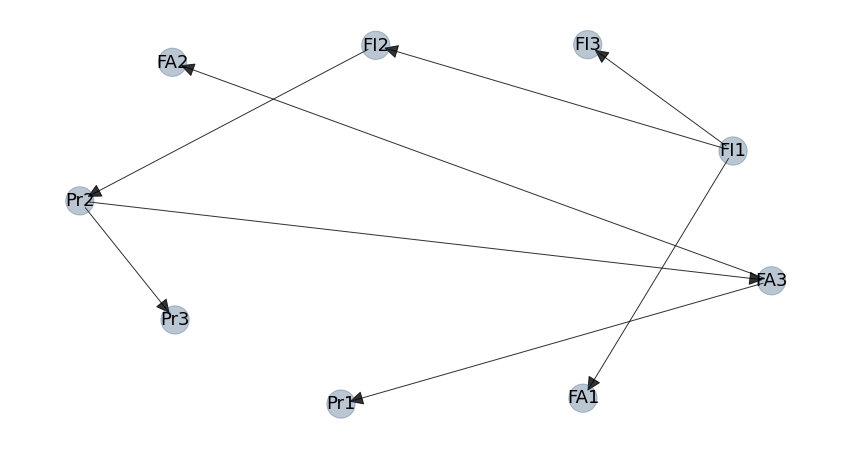

In [ ]:
##################### HONEST DAG #########################################
G1 = bn.plot(DAG_honest, interactive=False, title="honest_DAG", params_static=params_static, verbose=0)

###########################################################################


Given the DAG above it seems that $Pr2$ is influencing $Pr3$ scale of the questionnaire and $Pr2$ is influenced by the $FI2$ scale

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.


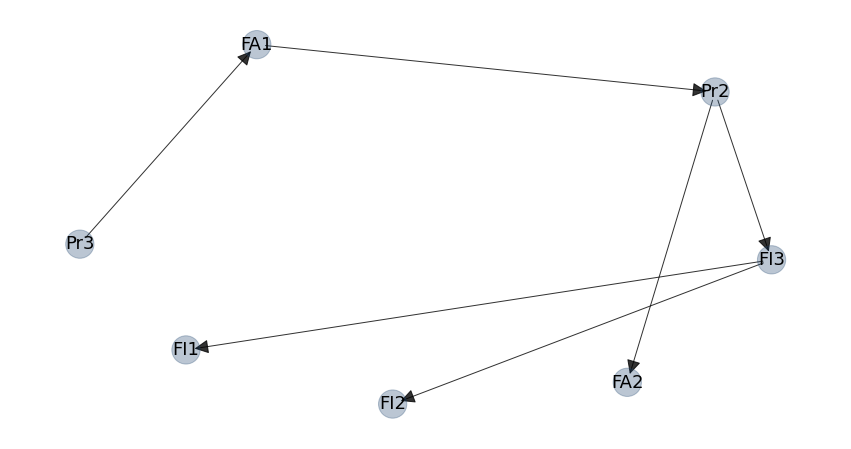

In [ ]:
##################### DISHONEST DAG ######################################

G2 = bn.plot(DAG_dishonest, interactive=False, title="dishonest_DAG",params_static=params_static, verbose=0)

###########################################################################


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.


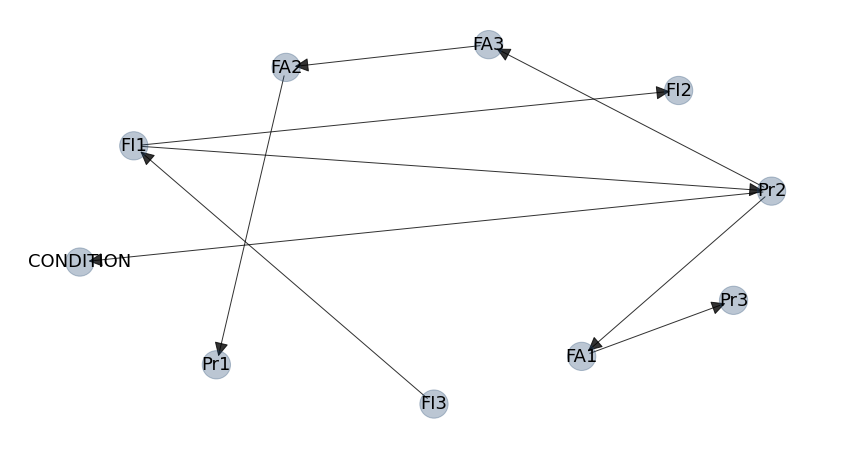

In [ ]:
##################### BOTH HONEST AND DISHONEST DAG #######################

G3 = bn.plot(DAG_all, interactive=False, title="DAG all",params_static=params_static, verbose=0)

###########################################################################



#### Generate Samples from DAG

Given a DAG there are different methods and metric score to generate new samples. In this case we used 2 methods and 3 score metrics

<br><font size="4">Methods</font>: 
1.   **Hillclimbsearch**. Its is a heuristic search approach that can be used if more nodes are used. HillClimbSearch implements a greedy local search that starts from the DAG “start” (default: disconnected DAG) and proceeds by iteratively performing single-edge manipulations that maximally increase the score. The search terminates once a local maximum is found. With Hillclimbsearch we can determine the best DAG for multiple nodes.
2.  **Chow-Liu Algorithm**. It is a Tree search based approach which finds the maximum-likelihood tree structure where each node has at most one parent

<br><font size="4">Metrics</font>: 


1.  **K2**. well-known evaluation measure (or scor-ing function) for learning Bayesian networks from data
2.   **BIC**. Bayesian information criterion attempts to resolve an overfitting  problem by introducing a penalty term for the number of parameters in the model: $BIC=kln(n)-2ln(L)$
3.  **BDEU**. A Bayesian Dirichlet scores such as BDEU is a to evaluate a Bayesina Network

---
The Generation process can be divided in three steps:


1.   Create an entire DataFrame with all *honest* and *dishonest* answers in one row
2.  Generate a set of samples with different type of scoring and methods using the Dataframe just created
3. Add all set of samples in a structure in order to reuse it for different algorithms



In [ ]:
#################### Import we need for this Part #####################################à
import generatesamples
from generatesamples import get_merged_df, generate_samples
import autoencoder
from autoencoder import plot_all
import reconstruction
from reconstruction import create_structure,get_max, get_round, my_accuracy, my_accuracy_old


In [ ]:
## clone git hub repo useful for next section
!git clone https://github.com/albertbup/deep-belief-network.git


fatal: destination path 'deep-belief-network' already exists and is not an empty directory.


In [ ]:
cd /content/deep-belief-network

/content/deep-belief-network


In [ ]:
from dbn.tensorflow import SupervisedDBNRegression
import dbn_rnn_lstm
from dbn_rnn_lstm import  rnn, lstm_1, lstm_2,DBN_procedure

## se da errore:
# 1 andare in deep-belief-network/dbn/tensorflow/models.py
# 2 cancellare import tensorflow
# 3 inserire: # import tensorflow.compat.v1 as tf
              # tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
###### Utility Function  ###############

def print_func(pred, keys):
  print("#"*60)
  print()
  print("-"*60)
  for i in range(len(keys)):
    print(f"Accuracy with data generated from {keys[i]}: {pred[i][0]}")
    print(f"MSE with data generated from {keys[i]}: {pred[i][1]}")
    print("-"*60)
  print()
  print("#"*60)

########################################

In [ ]:
## This is the merged DataFrame, in one row there are both honest and dishonest(marked with "_D") answers ##
## we used get_merged_df from generatesamples.py ##

df_hon = df.iloc[:225, :9]
df_dis = df.iloc[225:, :9]
new_df=get_merged_df(df_dis, df_hon)
new_df.head()

,Pr1,Pr2,Pr3,FA1,FA2,FA3,FI1,FI2,FI3,Pr1_D,Pr2_D,Pr3_D,FA1_D,FA2_D,FA3_D,FI1_D,FI2_D,FI3_D
0,4,2,3,2,2,2,2,2,1,4,3,3,3,4,3,2,3,1
1,2,3,2,3,2,1,3,2,3,4,4,4,4,4,4,4,0,4
2,4,3,3,4,4,4,3,3,3,4,4,4,3,4,3,4,4,4
3,3,3,2,1,3,2,3,2,3,4,3,4,3,3,4,4,3,3
4,3,2,2,3,3,3,4,3,3,4,4,4,4,4,4,4,4,4


In [ ]:
### Here we generate all samples with generate_samples function generatesamples.py ###

import bnlearn as bn
res_dic = generate_samples(new_df, samples=1000)
print("number of different dataset generated:", len(list(res_dic.keys())))
res_dic['hc_k2'].head()

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/153.0 [00:00<?, ?it/s]

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/153.0 [00:00<?, ?it/s]

[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/153.0 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/18 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/18 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/18 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/18 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 1000 samples..


  0%|          | 0/18 [00:00<?, ?it/s]

number of different dataset generated: 5


,Pr1,Pr2,Pr3,FA1,FA2,FA3,FI1,FI2,FI3,Pr1_D,Pr2_D,Pr3_D,FA1_D,FA2_D,FA3_D,FI1_D,FI2_D,FI3_D
0,3,3,2,2,3,3,4,4,4,3,4,3,4,4,4,4,4,4
1,3,3,0,3,3,3,2,3,1,4,4,4,4,4,1,2,3,1
2,4,1,2,3,3,3,1,1,3,2,4,2,3,4,4,4,4,4
3,4,0,0,2,2,2,2,1,2,3,4,2,3,4,4,4,4,4
4,2,3,3,3,4,4,2,2,2,4,4,3,3,4,4,3,3,3


In [ ]:
#### These are the names of the different dataset created ###
keys=list(res_dic.keys())


In [ ]:
 ## train_and_test is our structure that collect all train and validation split of data for the Deep Learning methods ###

train_and_test=[]
for k,v in res_dic.items():
  X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(res_dic[k].iloc[:,9:].to_numpy(), res_dic[k].iloc[:,:9].to_numpy(),
                                                      random_state=1)
  train_and_test.append(( X_train_gen, X_test_gen, y_train_gen, y_test_gen ))
  
  

#### Autoencoder

**Autoencoder** is a neural network that uses a backpropagation algorithm for feature learning. It works in two phases: **encoding and decoding**. In the encoding phase, the input data are mapped to a low-dimensional (or high) representation space to obtain the most appropriate feature, which again maps to the input space in the decoding phase.
In this project we used the **Denoising Autoencoder**: the data is partially corrupted by noises added to the input vector. Then, the model is trained to predict the original, uncorrupted data point as its output.
In our case the corrupted data is the *dishonest* answers while real data is the *honest* answers.


<img src='https://drive.google.com/uc?id=12V9p0lmEQiVhT3KtSGW3QVCSWd_76rEH'>


In order to try some different architecture we made two type of **Denosing Autoencoder** where the main difference is in the **number of the code size** (node *c* in figure above). <br>In one DAE we put a code size of $1$ while in the other one we assigned $144$

In [ ]:
import autoencoder
from autoencoder import create_undercomplete_AE, create_overcomplete_AE, get_history_and_prediction_AE, plot_all

In [ ]:
### This is the code for gettin History and Accuracy of model ###
### Overcomplete Autoencoder has code size=144 ###
### Undercomplete Autoencoder has code size=1 ###

h_total1, pred_total1=get_history_and_prediction_AE(train_and_test, dishonest, honest, keys, epochs=50, batch_size=16,undercomplete=False)
h_total2, pred_total2=get_history_and_prediction_AE(train_and_test, dishonest, honest, keys, epochs=300, batch_size=64,undercomplete=True)


Calculating for OVERCOMPLETE Autoencoder...
... Done for hc_k2... Missing 4 set of data
... Done for hc_bdeu... Missing 3 set of data
... Done for cl_bic... Missing 2 set of data
... Done for cl_k2... Missing 1 set of data
... Done for cl_bdeu... Missing 0 set of data
Calculating for UNDERCOMPLETE Autoencoder...
... Done for hc_k2... Missing 4 set of data
... Done for hc_bdeu... Missing 3 set of data
... Done for cl_bic... Missing 2 set of data
... Done for cl_k2... Missing 1 set of data
... Done for cl_bdeu... Missing 0 set of data


In [ ]:
print("UNDERCOMPLETE")
print_func(pred_total1, keys)


UNDERCOMPLETE
############################################################

------------------------------------------------------------
Accuracy with data generated from hc_k2: 31.604938271604937
MSE with data generated from hc_k2: 1.109802007675171
------------------------------------------------------------
Accuracy with data generated from hc_bdeu: 32.34567901234568
MSE with data generated from hc_bdeu: 1.100495457649231
------------------------------------------------------------
Accuracy with data generated from cl_bic: 33.876543209876544
MSE with data generated from cl_bic: 1.0985214710235596
------------------------------------------------------------
Accuracy with data generated from cl_k2: 33.77777777777778
MSE with data generated from cl_k2: 1.0994502305984497
------------------------------------------------------------
Accuracy with data generated from cl_bdeu: 33.77777777777778
MSE with data generated from cl_bdeu: 1.0987142324447632
---------------------------------------

In [ ]:
print("OVERCOMPLETE")
print_func(pred_total2, keys)


OVERCOMPLETE
############################################################

------------------------------------------------------------
Accuracy with data generated from hc_k2: 30.962962962962965
MSE with data generated from hc_k2: 1.1173694133758545
------------------------------------------------------------
Accuracy with data generated from hc_bdeu: 32.34567901234568
MSE with data generated from hc_bdeu: 1.100512981414795
------------------------------------------------------------
Accuracy with data generated from cl_bic: 34.02469135802469
MSE with data generated from cl_bic: 1.100754976272583
------------------------------------------------------------
Accuracy with data generated from cl_k2: 33.72839506172839
MSE with data generated from cl_k2: 1.0966236591339111
------------------------------------------------------------
Accuracy with data generated from cl_bdeu: 33.62962962962963
MSE with data generated from cl_bdeu: 1.0998975038528442
-----------------------------------------

#### DBN

The Deep Belief Network (**DBN**) is a kind of Deep Neural Network, which is composed of stacked layers of **Restricted Boltzmann Machines** (RBMs). 
<br>It is a generative model and was proposed by *Geoffrey Hinton* in 2006. <br><br>**DBN** can be used to solve unsupervised learning tasks to reduce the dimensionality of features, and can also be used to solve supervised learning tasks to build classification models or regression models.



<img src='https://drive.google.com/uc?id=1ed5GUrQ4XLtzjQNE9IgEpm7DOJnBLEGe'>


The DBN library used in this paragraph is taken from [GitHub](https://)

In [ ]:
cd /content/deep-belief-network

/content/deep-belief-network


In [ ]:
from dbn.tensorflow import SupervisedDBNRegression
import dbn_rnn_lstm
from dbn_rnn_lstm import  rnn, lstm_1, lstm_2,DBN_procedure


In [ ]:
#### This is the Procedure to fit the DBN model with all the dataset ####
all_acc_DBN=DBN_procedure(train_and_test, dishonest, honest)

[START] Pre-training step:
Instructions for updating:
Use `tf.cast` instead.
>> Epoch 1 finished 	RBM Reconstruction error 176.487574
>> Epoch 2 finished 	RBM Reconstruction error 173.037077
>> Epoch 3 finished 	RBM Reconstruction error 165.667617
>> Epoch 4 finished 	RBM Reconstruction error 181.772796
>> Epoch 5 finished 	RBM Reconstruction error 167.936073
>> Epoch 6 finished 	RBM Reconstruction error 159.376702
>> Epoch 7 finished 	RBM Reconstruction error 172.279739
>> Epoch 8 finished 	RBM Reconstruction error 167.544676
>> Epoch 9 finished 	RBM Reconstruction error 159.343995
>> Epoch 10 finished 	RBM Reconstruction error 163.093720
>> Epoch 11 finished 	RBM Reconstruction error 151.276091
>> Epoch 12 finished 	RBM Reconstruction error 156.492859
>> Epoch 13 finished 	RBM Reconstruction error 155.986753
>> Epoch 14 finished 	RBM Reconstruction error 155.517490
>> Epoch 15 finished 	RBM Reconstruction error 164.642654
>> Epoch 1 finished 	RBM Reconstruction error 3281.217285
>> E

In [ ]:
print_func(all_acc_DBN, keys)

############################################################

------------------------------------------------------------
Accuracy with data generated from hc_k2: 32.74074074074074
MSE with data generated from hc_k2: 1.1073094606399536
------------------------------------------------------------
Accuracy with data generated from hc_bdeu: 34.71604938271605
MSE with data generated from hc_bdeu: 1.0931754112243652
------------------------------------------------------------
Accuracy with data generated from cl_bic: 32.641975308641975
MSE with data generated from cl_bic: 1.0875120162963867
------------------------------------------------------------
Accuracy with data generated from cl_k2: 32.98765432098765
MSE with data generated from cl_k2: 1.0843716859817505
------------------------------------------------------------
Accuracy with data generated from cl_bdeu: 33.58024691358025
MSE with data generated from cl_bdeu: 1.091676950454712
-----------------------------------------------------

#### Simple RNN and LSTM

##### RNN

A recurrent neural network (**RNN**) is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. <br>Derived from feedforward neural networks, **RNNs** can use their internal state (memory) to process variable length sequences of inputs.
<br>In our problem could be a good solution having the memory state in order to predict the right output sequence given the input sequence.

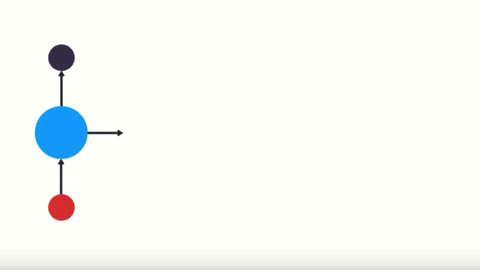

In [ ]:
#### Methods that returns History and Accuracy of RNN the set of data ####
h, pred_rnn=rnn(train_and_test, dishonest, honest)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
print_func(pred_rnn, keys)

############################################################

------------------------------------------------------------
Accuracy with data generated from hc_k2: 33.03703703703704
MSE with data generated from hc_k2: 1.1033517122268677
------------------------------------------------------------
Accuracy with data generated from hc_bdeu: 34.17283950617284
MSE with data generated from hc_bdeu: 1.1043717861175537
------------------------------------------------------------
Accuracy with data generated from cl_bic: 34.22222222222222
MSE with data generated from cl_bic: 1.0960925817489624
------------------------------------------------------------
Accuracy with data generated from cl_k2: 28.839506172839506
MSE with data generated from cl_k2: 1.0990591049194336
------------------------------------------------------------
Accuracy with data generated from cl_bdeu: 34.66666666666667
MSE with data generated from cl_bdeu: 1.0832222700119019
----------------------------------------------------

#####LSTM

One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task.
<br>Sometimes, we only need to look at recent information to perform the present task. <br>For example, consider a language model trying to predict the next word based on the previous ones.
If we are trying to predict the last word in "*The clouds are in the ...*" we don’t need any further context – it’s pretty obvious the next word is going to be **sky**.

But there are also cases where we need more context. Consider trying to predict the last word in the text “**I grew up in France… I speak fluent** *French*.” Recent information suggests that the next word is probably the name of a language, but if we want to narrow down which language, we need the context of France, from further back. In this case we need to consider the long-term dependencies.

In our problem could be useful to use the long-term dependencies considering a sequence of 9 elements (the 9 questions), in order to see if the answers can create a context useful for predict the next answer's question

**Long Short Term Memory networks** – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.



---

In this paragraph we have implemented two types of LSTM with different architecture


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#### First LSTM architecture ####
h, pred_lstm_1 = lstm_1(train_and_test, dishonest, honest, verbose=1)

Train on 750 samples, validate on 250 samples
Epoch 1/150
750/750 [==============================] - 3s 4ms/sample - loss: 4.6034 - val_loss: 4.3686
Epoch 2/150
750/750 [==============================] - 0s 154us/sample - loss: 3.9555 - val_loss: 3.7169
Epoch 3/150
750/750 [==============================] - 0s 156us/sample - loss: 3.3558 - val_loss: 3.1046
Epoch 4/150
750/750 [==============================] - 0s 162us/sample - loss: 2.8257 - val_loss: 2.6139
Epoch 5/150
750/750 [==============================] - 0s 153us/sample - loss: 2.4356 - val_loss: 2.2707
Epoch 6/150
750/750 [==============================] - 0s 163us/sample - loss: 2.1511 - val_loss: 2.0096
Epoch 7/150
750/750 [==============================] - 0s 152us/sample - loss: 1.9079 - val_loss: 1.7568
Epoch 8/150
750/750 [==============================] - 0s 166us/sample - loss: 1.6896 - val_loss: 1.5673
Epoch 9/150
750/750 [==============================] - 0s 158us/sample - loss: 1.5306 - val_loss: 1.4339
Epoch 10/15

In [ ]:
print_func(pred_lstm_1, keys)


############################################################

------------------------------------------------------------
Accuracy with data generated from hc_k2: 29.185185185185187
MSE with data generated from hc_k2: 1.1482993364334106
------------------------------------------------------------
Accuracy with data generated from hc_bdeu: 33.72839506172839
MSE with data generated from hc_bdeu: 1.0960876941680908
------------------------------------------------------------
Accuracy with data generated from cl_bic: 33.876543209876544
MSE with data generated from cl_bic: 1.0969905853271484
------------------------------------------------------------
Accuracy with data generated from cl_k2: 33.876543209876544
MSE with data generated from cl_k2: 1.0962616205215454
------------------------------------------------------------
Accuracy with data generated from cl_bdeu: 32.88888888888889
MSE with data generated from cl_bdeu: 1.0967119932174683
--------------------------------------------------

In [ ]:
#### Second LSTM architecture ####

h, pred_lstm_2 = lstm_2(train_and_test, dishonest, honest,verbose=1)


Train on 750 samples
Epoch 1/150
750/750 [==============================] - 1s 2ms/sample - loss: 9.8749 - time_distributed_20_loss: 6.3545 - time_distributed_21_loss: 3.4065
Epoch 2/150
750/750 [==============================] - 1s 675us/sample - loss: 3.2019 - time_distributed_20_loss: 1.2893 - time_distributed_21_loss: 1.8930
Epoch 3/150
750/750 [==============================] - 1s 682us/sample - loss: 1.8987 - time_distributed_20_loss: 0.5356 - time_distributed_21_loss: 1.3629
Epoch 4/150
750/750 [==============================] - 1s 694us/sample - loss: 1.6534 - time_distributed_20_loss: 0.4250 - time_distributed_21_loss: 1.2278
Epoch 5/150
750/750 [==============================] - 1s 697us/sample - loss: 1.5772 - time_distributed_20_loss: 0.3954 - time_distributed_21_loss: 1.1840
Epoch 6/150
750/750 [==============================] - 1s 687us/sample - loss: 1.5154 - time_distributed_20_loss: 0.3604 - time_distributed_21_loss: 1.1599
Epoch 7/150
750/750 [========================

In [ ]:
print_func(pred_lstm_2, keys)


############################################################

------------------------------------------------------------
Accuracy with data generated from hc_k2: 29.827160493827158
MSE with data generated from hc_k2: 1.1294373273849487
------------------------------------------------------------
Accuracy with data generated from hc_bdeu: 33.53086419753086
MSE with data generated from hc_bdeu: 1.0995807647705078
------------------------------------------------------------
Accuracy with data generated from cl_bic: 33.53086419753086
MSE with data generated from cl_bic: 1.097985863685608
------------------------------------------------------------
Accuracy with data generated from cl_k2: 34.22222222222222
MSE with data generated from cl_k2: 1.1088930368423462
------------------------------------------------------------
Accuracy with data generated from cl_bdeu: 32.641975308641975
MSE with data generated from cl_bdeu: 1.1022096872329712
----------------------------------------------------

#### Brute Force

The BruteFroce is a method we implemented for this problem. The algorithm aims to retrieve the best result and the best questions that can be used to define a kind of importance relationship between the asnwers.

This methods works in this way: First of all a set of classic regression methods is defined and then every model is fitted with all the possible combination. Then for every column the methods returns the best Accuracy, the best MSE  and the questions that give that results. This last parameter enphasizes an empirical relationship or influence between the questions

With this method we also implemented a different Accuracy. In fact we changed the `np.round` treshold. For example `n.round(3.4)` will return $3$, with our method we can change the treshold in order to change the resut of `np.round(3.4)` in $4$.
<br>We did this because we looked at the frequencies of the answers in the dataset (table below) and we wanted to assign a different treshold given these frequencies. For example with a prediction of $0.4$, which is the next int to round? in this case, given the low frequency of the $0$ answer, is better to round $0.4$ to $1$

Answer Value | Frequency 
-------------------|------------------
$0$       | $5.7%$ % 
$1$      |  $12.4%$ % 
$2$ |  $24.9%$ % 
$3$ |  $36.9%$ % 
$4$ |  $20.1%$ % 



---
Form this part of the project we stopped to use the generated data because the results achieved were not satisfactory and we take in account the real data.


**N.B.** Even if the generated data didn't take to a good solution, we made an effort and we tried it with the BruteForce method. The computing time was very high because the generated data is composed of $5000$ samples in total and they didn't improve with respect to the BruteForce with real data.





In [ ]:
import reconstruction 
from reconstruction import my_accuracy,data_prep,create_structure, get_max

In [ ]:
##### Training on real data and not genearated ######
_,_, _, _, X_train, y_train, X_test, y_test = data_prep(df, 9)
print("X_train shape", X_train.shape, "\tY_train shape", y_train.shape)
print("X_test shape", X_test.shape, "\tY_test shape", y_test.shape)

X_train shape (160, 9) 	Y_train shape (160, 9)
X_test shape (65, 9) 	Y_test shape (65, 9)


In [ ]:
### Frequencies of values in answers  ###
unique, counts = np.unique(y_train, return_counts=True)

counts=100*counts/(sum(counts))
np.asarray((unique, counts)).T

array([[ 0.        ,  5.69444444],
       [ 1.        , 12.43055556],
       [ 2.        , 24.86111111],
       [ 3.        , 36.875     ],
       [ 4.        , 20.13888889]])

In [ ]:
###### Treshold Dict  ###########
asnwers=np.array([0,1,2,3,4])
values=np.array([0.1,0.3,0.3,0.8,1])
treshold_dict = dict(zip(asnwers,values))
treshold_dict

{0: 0.1, 1: 0.3, 2: 0.3, 3: 0.8, 4: 1.0}

In [ ]:
### BruteForce Methods ###
d = create_structure(X_train, X_test, y_train, \
                                         y_test, False, treshold_dict)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
computing for model  XGBRegressor(objective='reg:squarederror')
----------
computing for column:  0
----------
computing for column:  1
----------
computing for column:  2
----------
computing for column:  3
----------
computing for column:  4
----------
computing for column:  5
----------
computing for column:  6
----------
computing for column:  7
----------
computing for column:  8
computing for model  ExtraTreeRegressor()
----------
computing for column:  0
----------
computing for column:  1
----------
computing for column:  2
----------
computing for column:  3
----------
computing for column:  4
----------
computing for column:  5
----------
computing for column:  6
----------
computing for column:  7
----------
computing for column:  8
computing for model  SVC()
----------
computing for column:  0
----------
computing for column:  1
----------
computing for column:  2
----------
computing for column:  3
----------
computing for column:  4
----------


In [ ]:
### Maximum Accuracy reached by BruteForce with the model and columns take into account ####
max_acc, min_mse = get_max(d)
acc_df = pd.DataFrame(max_acc, columns=['Model', 'Accuracy', 'Columns'], index=list(df.columns)[:-1])
acc_df

,Model,Accuracy,Columns
Pr1,DecisionTreeRegressor(),46.153846,"(0, 2, 3, 4, 6, 7)"
Pr2,DecisionTreeRegressor(),44.615385,"(0, 1, 4)"
Pr3,DecisionTreeRegressor(),43.076923,"(0, 2, 3, 6)"
FA1,ExtraTreeRegressor(),47.692308,"(0, 2, 5)"
FA2,DecisionTreeRegressor(),52.307692,"(0, 4)"
FA3,SGDRegressor(),50.769231,"(1, 2, 4)"
FI1,SGDRegressor(),41.538462,"(0, 2, 3, 4, 8)"
FI2,DecisionTreeRegressor(),43.076923,"(1, 7)"
FI3,LinearSVR(),44.615385,"(0, 5, 6, 8)"


In [ ]:
### Minimum MSE reached by BruteForce with the model and columns take into account ####

mse_df = pd.DataFrame(min_mse, columns=['Model', 'MSE', 'acc', 'Columns '], index=list(df.columns)[:-1])
mse_df=mse_df.drop(columns='acc')
mse_df


,Model,MSE,Columns
Pr1,KNeighborsRegressor(),0.955309,"(0, 2, 3, 7)"
Pr2,SGDRegressor(),0.938901,"(1, 2, 3, 4)"
Pr3,KNeighborsRegressor(),1.052470,"(0, 7)"
FA1,SGDRegressor(),1.173605,"(0, 4)"
FA2,KNeighborsRegressor(),0.910452,"(0, 3, 4, 8)"
FA3,SGDRegressor(),0.939268,"(0, 1, 3, 4, 5, 8)"
FI1,KNeighborsRegressor(),1.127830,"(4, 5, 6, 7)"
FI2,KNeighborsRegressor(),0.978224,"(0, 5, 6, 7)"
FI3,KNeighborsRegressor(),1.002151,"(5, 6, 7)"


In [ ]:
### Final Result ####
print("Total Reconstruction Accuracy", np.mean([x[1] for x in max_acc]))
print("Total Reconstruction Mean Squared Error",np.mean([x[1] for x in min_mse]))


Total Reconstruction Accuracy 45.98290598290598
Total Reconstruction Mean Squared Error 1.0086900470836742


This is result is the best so far! 

#### One Class SVM

The [Support Vector Method For Novelty ](https://proceedings.neurips.cc/paper/1999/file/8725fb777f25776ffa9076e44fcfd776-Paper.pdf)Detection by *Schölkopf et al.* basically separates all the data points from the origin and maximizes the distance from this hyperplane to the origin. This results in a binary function which captures regions in the input space where the probability density of the data lives. Thus the function returns +1 in a “small” region (capturing the training data points) and −1 elsewhere.

the One Class SBVM is a [novelty detector](https://eprints.whiterose.ac.uk/767/1/hodgevj4.pdf), so it returns the outlies in the data. In this way we can eliminate them and re-run the BruteFroce method with the new data without the outliers. This is what we have done in this paragraph.

In [ ]:
### One class SVM ####
## idx = Honest train responses that are NOT outliers ##
## idx2 = Honest test responses that are NOT outliers ##

from sklearn import svm
svr = sklearn.svm.OneClassSVM()
svr.fit(y_train)

idx=np.where(svr.predict(y_train)==1)
svr = sklearn.svm.OneClassSVM()
svr.fit(y_test)
idx2=np.where(svr.predict(y_test)==1)


In [ ]:
### C reate a Treshold Dictionary based on the standard round (so treshold = 0.5) ###
### For 4 treshold is 1 because if we predict 4.9, the rounded must be 4! value of 5 not present in real datatset ###
answers=np.array([0,1,2,3,4])
values=np.array([0.5,0.5,0.5,0.5,1])
treshold_dict = dict(zip(answers,values))
treshold_dict

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 1.0}

In [ ]:
## BruteForce with data without outliers ##
d = create_structure(X_train[idx], X_test[idx2], y_train[idx], \
                                         y_test[idx2], False, treshold_dict)
max_acc, min_mse = get_max(d)
acc_df = pd.DataFrame(max_acc, columns=['Model', 'Accuracy', 'Columns'], index=list(df.columns)[:-1])
mse_df = pd.DataFrame(min_mse, columns=['Model', 'MSE', 'acc', 'Columns '], index=list(df.columns)[:-1])
mse_df=mse_df.drop(columns='acc')


[0, 1, 2, 3, 4, 5, 6, 7, 8]
computing for model  XGBRegressor(objective='reg:squarederror')
----------
computing for column:  0
----------
computing for column:  1
----------
computing for column:  2
----------
computing for column:  3
----------
computing for column:  4
----------
computing for column:  5
----------
computing for column:  6
----------
computing for column:  7
----------
computing for column:  8
computing for model  ExtraTreeRegressor()
----------
computing for column:  0
----------
computing for column:  1
----------
computing for column:  2
----------
computing for column:  3
----------
computing for column:  4
----------
computing for column:  5
----------
computing for column:  6
----------
computing for column:  7
----------
computing for column:  8
computing for model  SVC()
----------
computing for column:  0
----------
computing for column:  1
----------
computing for column:  2
----------
computing for column:  3
----------
computing for column:  4
----------


In [ ]:
## Maximum Accuracy with the model and columns taken into account ##
acc_df

,Model,Accuracy,Columns
Pr1,ExtraTreeRegressor(),60.606061,"(0, 1, 2, 3, 4, 5, 7, 8)"
Pr2,SVC(),63.636364,"(2, 3, 6, 8)"
Pr3,DecisionTreeRegressor(),48.484848,"(1, 2)"
FA1,DecisionTreeRegressor(),60.606061,"(0, 5, 6, 8)"
FA2,ExtraTreeRegressor(),63.636364,"(0, 1, 4, 6, 7)"
FA3,DecisionTreeRegressor(),72.727273,"(0, 2, 3, 4, 5, 6, 7, 8)"
FI1,SGDRegressor(),57.575758,"(0, 2, 5, 7, 8)"
FI2,SVR(),51.515152,"(1, 2, 7)"
FI3,SGDRegressor(),57.575758,"(2, 3, 4, 6, 7)"


In [ ]:
## Minimum MSE with the model and columns taken into account ##
mse_df

,Model,MSE,Columns
Pr1,KNeighborsRegressor(),0.749141,"(0, 1, 3, 5, 8)"
Pr2,KNeighborsRegressor(),0.641967,"(0, 1, 6, 7)"
Pr3,ExtraTreeRegressor(),0.820582,"(0, 1, 4, 5, 6, 7, 8)"
FA1,XGBRegressor(objective='reg:squarederror'),0.818980,"(0, 1, 2, 3, 5)"
FA2,ExtraTreeRegressor(),0.713573,"(0, 1, 3, 5, 6, 7, 8)"
FA3,DecisionTreeRegressor(),0.642229,"(0, 1, 3, 5, 7, 8)"
FI1,SGDRegressor(),0.825140,"(0, 1, 3, 4, 5, 6, 7, 8)"
FI2,SGDRegressor(),0.868171,"(0, 1, 2, 3, 7, 8)"
FI3,SGDRegressor(),0.676636,"(0, 2, 3, 4, 5, 6, 8)"


In [ ]:

print("Total Reconstruction Accuracy", np.mean(acc_df['Accuracy']))
print("Total Reconstruction Mean Squared Error",np.mean(mse_df['MSE']))


Total Reconstruction Accuracy 59.5959595959596
Total Reconstruction Mean Squared Error 0.7507131474444354


##Final Result

\begin{array}{ |p{3cm}||p{3cm}|p{3cm}|p{3cm}|  }
\hline
\hline
Model& Accuracy (\%) &MSE\\
\hline
Average Remover &35.6&1.1812\\
DAE&   34  & 1.0966 \\
 DBN &34.7 & 1.0731\\
 RNN    &34.7 & 1.0832\\
 LSTM&   34.2  & 1.0960\\
 BruteForce& 45  & 1.0087\\
 One Class SVM_{withBruteForce}& 59.6 & 0.75  \\
 \hline
\end{array}
<br>From the table above we can claim that Brute Force methods is the best one, expecially when it's used one the outliers detector.


---


In particular we report also the result with best model and columns:<br><br>
\begin{array}{ |p{3cm}||p{3cm}|p{3cm}|p{3cm}|  }
\hline
\hline
Column & Model & InfluencingColumns\\
\hline
Pr1 &ExtraTreeRegressor& Pr1, Pr2, Pr3, FA1, FA2, FA3, FI2, FI3\\
Pr2 &   SVC()  &Pr3, FA1, FI1, FI3 \\
 Pr3 &DecisionTreeRegressor & Pr2, Pr3\\
 FA1    & DecisionTreeRegressor & Pr1, FA3, FI1, FI3\\
 FA2 &  ExtraTreeRegressor  & Pr1, Pr2, FA2, FI1, FI2\\
 FA3 & DecisionTreeRegressor & Pr1, Pr3, FA1, FA2, FA3, FI1, FI2,FI3\\
 FI1 & SGDRegressor & Pr1, Pr3, FA3, FI2, FI3 \\
  FI2 & SVR & Pr2, Pr3, FI2  \\
 FI3 & SGDRegressor & Pr3, FA1, FA2, FI1, FI2  \\
\hline
\end{array}


## Demo

In this [Demo](https://share.streamlit.io/federicozanotti/streamlit-prova/main/app.py) we prepared some stuff, Enjoy! 😀

the Demo source code is here: [source code web app](https://github.com/FedericoZanotti/streamlit-prova.git)